## i. Introduction

**Jeu de données** : Telecom Customer Churn (source : Kaggle)

Ce jeu de données regroupe environ 7 000 fiches clients d’un opérateur de télécommunications californien au deuxième trimestre 2022. Chaque enregistrement correspond à un client et décrit :
- ses caractéristiques démographiques (âge, genre, etc.),  
- sa localisation,  
- sa durée d’abonnement (tenure),  
- les services souscrits (voix, données, streaming, etc.),  
- son statut à l’issue du trimestre (nouveau, actif ou churn). 

Pour plus d'informations, veuillez consulter [ici](https://www.kaggle.com/datasets/shilongzhuang/telecom-customer-churn-by-maven-analytics).

**Objectif** : Le projet vise à prédire le taux de désabonnement des clients à l'aide de l'apprentissage automatique. En analysant les données historiques des clients, le modèle identifie des modèles afin de déterminer quels clients sont susceptibles de cesser d'utiliser les services de l'entreprise.

## ii. Importation des Libraries

In [1]:
# Import des bibliothèques

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.svm import SVC # Support Vector Machine
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, recall_score
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as Pipeline

import warnings
warnings.filterwarnings(action='ignore')

## iii. Chargement des données et Aperçu

### iii.i Chargement des données et informations générales

Voici les informations détaillées concernant chaque colonne du jeu de données :

| Champ                              | Description                                                                                                                                                     |
|------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `Customer ID`                      | Identifiant unique attribué à chaque client.                                                                                                                         |
| `Gender`                           | Genre du client : Homme, Femme.                                                                                                                                       |
| `Age`                              | Âge du client en années à la fin du trimestre (T2 2022).                                                                                                              |
| `Married`                          | Statut marital : Oui, Non.                                                                                                                                            |
| `Number of Dependents`            | Nombre de personnes à charge vivant avec le client (enfants, parents, grands-parents, etc.).                                                                         |
| `City`                             | Ville de résidence principale du client en Californie.                                                                                                                |
| `Zip Code`                         | Code postal de la résidence principale du client.                                                                                                                    |
| `Latitude`                         | Latitude géographique de la résidence principale du client.                                                                                                           |
| `Longitude`                        | Longitude géographique de la résidence principale du client.                                                                                                          |
| `Number of Referrals`             | Nombre de fois que le client a parrainé un ami ou un membre de sa famille pour souscrire à l’offre de l’entreprise.                                                  |
| `Tenure in Months`                | Nombre total de mois d’abonnement du client à la fin du trimestre spécifié.                                                                                          |
| `Offer`                            | Dernière offre marketing à laquelle le client a souscrit : Aucune, Offre A, Offre B, Offre C, Offre D, Offre E.                                                      |
| `Phone Service`                    | Abonnement à la ligne fixe : Oui, Non.                                                                                                                                |
| `Avg Monthly Long Distance Charges` | Montant moyen des frais longue distance par mois jusqu’à la fin du trimestre (0 si pas d’abonnement téléphonique).                                                 |
| `Multiple Lines`                  | Abonnement à plusieurs lignes téléphoniques : Oui, Non (Non si pas d’abonnement téléphonique).                                                                       |
| `Internet Service`                | Abonnement à Internet : Oui, Non.                                                                                                                                     |
| `Internet Type`                   | Type de connexion : DSL, Fibre optique, Câble (Aucun si pas d’abonnement Internet).                                                                                  |
| `Avg Monthly GB Download`         | Volume moyen de données téléchargées en gigaoctets par mois jusqu’à la fin du trimestre (0 si pas d’abonnement Internet).                                            |
| `Online Security`                 | Abonnement au service de sécurité en ligne : Oui, Non (Non si pas d’abonnement Internet).                                                                            |
| `Online Backup`                   | Abonnement au service de sauvegarde en ligne : Oui, Non (Non si pas d’abonnement Internet).                                                                          |
| `Device Protection Plan`          | Abonnement au plan de protection des équipements Internet : Oui, Non (Non si pas d’abonnement Internet).                                                             |
| `Premium Tech Support`            | Abonnement à un support technique prioritaire : Oui, Non (Non si pas d’abonnement Internet).                                                                         |
| `Streaming TV`                    | Utilisation du service Internet pour regarder la télévision : Oui, Non (Non si pas d’abonnement Internet).                                                           |
| `Streaming Movies`                | Utilisation du service Internet pour regarder des films : Oui, Non (Non si pas d’abonnement Internet).                                                               |
| `Streaming Music`                 | Utilisation du service Internet pour écouter de la musique : Oui, Non (Non si pas d’abonnement Internet).                                                            |
| `Unlimited Data`                  | Option de données illimitées : Oui, Non (Non si pas d’abonnement Internet).                                                                                           |
| `Contract`                         | Durée du contrat : Mois par mois, 1 an, 2 ans.                                                                                                                        |
| `Paperless Billing`               | Choix de la facturation sans papier : Oui, Non.                                                                                                                       |
| `Payment Method`                  | Mode de paiement de la facture : Prélèvement bancaire, Carte de crédit, Chèque.                                                                                      |
| `Monthly Charge`                  | Montant total facturé par mois pour tous les services.                                                                                                                |
| `Total Charges`                   | Somme des charges facturées jusqu’à la fin du trimestre spécifié.                                                                                                     |
| `Total Refunds`                   | Montant total des remboursements effectués jusqu’à la fin du trimestre spécifié.                                                                                      |
| `Total Extra Data Charges`       | Total des frais facturés pour les dépassements de données jusqu’à la fin du trimestre spécifié.                                                                      |
| `Total Long Distance Charges`    | Total des frais longue distance au-delà du forfait jusqu’à la fin du trimestre spécifié.                                                                              |
| `Total Revenue`                  | Chiffre d’affaires total généré par le client (Charges totales − Remboursements + Frais extra données + Frais longue distance) à la fin du trimestre spécifié.       |
| `Customer Status`                | Statut du client en fin de trimestre : Churned (parti), Resté, Ou Rejoint.                                                                                            |
| `Churn Category`                 | Catégorie générique du motif de départ : Attitude, Concurrence, Insatisfaction, Autre, Prix.                                                                          |
| `Churn Reason`                   | Motif précis indiqué par le client lors de son départ.                                                                                                                 |


In [2]:
# # Chargement du jeu de données puis affichage des 10 premières données

df = pd.read_csv('Customer Churn Prediction - ML.csv')
df.head(10)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
5,0013-MHZWF,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,...,Credit Card,69.40,571.45,0.00,0,150.93,722.38,Stayed,NaN,NaN
6,0013-SMEOE,Female,67,Yes,0,Lompoc,93437,34.757477,-120.550507,1,...,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,8611.41,Stayed,NaN,NaN
7,0014-BMAQU,Male,52,Yes,0,Napa,94558,38.489789,-122.270110,8,...,Credit Card,84.65,5377.80,0.00,20,816.48,6214.28,Stayed,NaN,NaN
8,0015-UOCOJ,Female,68,No,0,Simi Valley,93063,34.296813,-118.685703,0,...,Bank Withdrawal,48.20,340.35,0.00,0,73.71,414.06,Stayed,NaN,NaN
9,0016-QLJIS,Female,43,Yes,1,Sheridan,95681,38.984756,-121.345074,3,...,Credit Card,90.45,5957.90,0.00,0,1849.90,7807.80,Stayed,NaN,NaN


In [3]:
# Affichage des 10 dernières données pour obtenir plus d'informations

df.tail(10)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
7033,9975-SKRNR,Male,24,No,0,Sierraville,96126,39.559709,-120.345639,0,...,Credit Card,18.90,18.90,0.0,0,49.51,68.41,Joined,NaN,NaN
7034,9978-HYCIN,Male,72,Yes,1,Bakersfield,93301,35.383937,-119.020428,1,...,Bank Withdrawal,84.95,4018.05,0.0,80,1987.63,6085.68,Stayed,NaN,NaN
7035,9979-RGMZT,Female,20,No,0,Los Angeles,90022,34.023810,-118.156582,0,...,Credit Card,94.05,633.45,0.0,0,255.43,888.88,Stayed,NaN,NaN
7036,9985-MWVIX,Female,53,No,0,Hume,93628,36.807595,-118.901544,0,...,Credit Card,70.15,70.15,0.0,0,42.09,112.24,Churned,Competitor,Competitor had better devices
7037,9986-BONCE,Female,36,No,0,Fallbrook,92028,33.362575,-117.299644,0,...,Bank Withdrawal,20.95,85.50,0.0,0,8.04,93.54,Churned,Competitor,Competitor made better offer
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.0,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.0,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.0,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.0,0,142.04,4769.69,Stayed,NaN,NaN
7042,9995-HOTOH,Male,36,Yes,0,Sierra City,96125,39.600599,-120.636358,1,...,Bank Withdrawal,59.00,3707.60,0.0,0,0.00,3707.60,Stayed,NaN,NaN


In [4]:
# Vérification des informations générales

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

D’après les informations ci-dessus, nous constatons que :

* Le jeu de données comporte 7 043 enregistrements.
* Il contient au total 38 variables (colonnes).
* Trois types de données y sont présents : float (9 colonnes), integer (6 colonnes) et object (23 colonnes).
* Des valeurs manquantes sont présentes dans ce jeu de données.

In [5]:
# Manipulation des noms de colonnes pour en faciliter l'utilisation tout au long du projet.

df.columns=df.columns.str.replace(' ','_').str.lower()

df

,customer_id,gender,age,married,number_of_dependents,city,zip_code,latitude,longitude,number_of_referrals,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


### iii.ii Vérification et gestion des lignes dupliquées


In [6]:
# Vérification des lignes dupliquées dans le jeu de données


df.duplicated().sum()

0

**Aucun doublon** dans ce jeu de données, nous pouvons donc poursuivre sans supprimer de données.


### iii.iii Vérification et gestion des valeurs manquantes (si nécessaire)


In [7]:
# Vérification des valeurs manquantes dans le jeu de données

df.isnull().sum()

customer_id                             0
gender                                  0
age                                     0
married                                 0
number_of_dependents                    0
city                                    0
zip_code                                0
latitude                                0
longitude                               0
number_of_referrals                     0
tenure_in_months                        0
offer                                3877
phone_service                           0
avg_monthly_long_distance_charges     682
multiple_lines                        682
internet_service                        0
internet_type                        1526
avg_monthly_gb_download              1526
online_security                      1526
online_backup                        1526
device_protection_plan               1526
premium_tech_support                 1526
streaming_tv                         1526
streaming_movies                  

Il y a **beaucoup de valeurs manquantes** dans ce jeu de données. Nous allons les traiter ici.

Étant donné que le jeu de données provient d’une entreprise de télécommunications proposant deux services principaux (service téléphonique et service Internet), il est important de noter que **tous les clients ne souscrivent pas nécessairement aux deux services**. Par conséquent, la présence de valeurs nulles est liée à l’absence de certains services pour certains clients.

Nous commencerons par la colonne `avg_monthly_long_distance_charges`. Comme indiqué dans la description, *si le client n’est pas abonné au service téléphonique, cette valeur est égale à 0*. Nous allons donc **imputer les valeurs manquantes avec 0**.


In [8]:
# Vérification des lignes contenant des valeurs manquantes dans avg_monthly_long_distance_charges

selected_columns1 = ['customer_id', 'avg_monthly_long_distance_charges', 'phone_service']
missing_rows1 = df[df['avg_monthly_long_distance_charges'].isnull()][selected_columns1]

print(missing_rows1)

     customer_id  avg_monthly_long_distance_charges phone_service
10    0017-DINOC                                NaN            No
14    0019-GFNTW                                NaN            No
16    0020-JDNXP                                NaN            No
19    0023-HGHWL                                NaN            No
25    0032-PGELS                                NaN            No
...          ...                                ...           ...
6979  9906-NHHVC                                NaN            No
6980  9907-SWKKF                                NaN            No
6996  9928-BZVLZ                                NaN            No
7016  9955-QOPOY                                NaN            No
7042  9995-HOTOH                                NaN            No

[682 rows x 3 columns]


In [9]:
# Remplissage des valeurs manquantes de la colonne avg_monthly_long_distance_charges avec 0

df.avg_monthly_long_distance_charges = df.avg_monthly_long_distance_charges.fillna(0.0)

Il en va de même pour la colonne `multiple_lines`. Comme l’indique la description, si le client n’est pas abonné au service téléphonique, la valeur sera No.
Par conséquent, nous allons remplacer les valeurs manquantes par No.

In [10]:
# Vérification des lignes contenant des valeurs manquantes dans multiple_lines 

selected_columns2 = ['customer_id', 'multiple_lines', 'phone_service']
missing_rows2 = df[df['multiple_lines'].isnull()][selected_columns2]

print(missing_rows2)

     customer_id multiple_lines phone_service
10    0017-DINOC            NaN            No
14    0019-GFNTW            NaN            No
16    0020-JDNXP            NaN            No
19    0023-HGHWL            NaN            No
25    0032-PGELS            NaN            No
...          ...            ...           ...
6979  9906-NHHVC            NaN            No
6980  9907-SWKKF            NaN            No
6996  9928-BZVLZ            NaN            No
7016  9955-QOPOY            NaN            No
7042  9995-HOTOH            NaN            No

[682 rows x 3 columns]


In [11]:
# Remplissage des valeurs manquantes de la colonne multiple_lines avec No

df.multiple_lines = df.multiple_lines.fillna('No')

Ensuite, nous appliquons le même traitement à la colonne `avg_monthly_gb_download`. Comme le précise la description, si le client n’est pas abonné au service Internet, la valeur sera 0.
Nous allons donc remplacer les valeurs manquantes par 0.

In [12]:
# Vérification des lignes contenant des valeurs manquantes dans avg_monthly_gb_download 

selected_columns3 = ['customer_id', 'avg_monthly_gb_download', 'internet_service']
missing_rows3 = df[df['avg_monthly_gb_download'].isnull()][selected_columns3]

print(missing_rows3)

     customer_id  avg_monthly_gb_download internet_service
20    0023-UYUPN                      NaN               No
23    0030-FNXPP                      NaN               No
24    0031-PVLZI                      NaN               No
27    0040-HALCW                      NaN               No
28    0042-JVWOJ                      NaN               No
...          ...                      ...              ...
7026  9970-QBCDA                      NaN               No
7028  9972-EWRJS                      NaN               No
7032  9975-GPKZU                      NaN               No
7033  9975-SKRNR                      NaN               No
7037  9986-BONCE                      NaN               No

[1526 rows x 3 columns]


In [13]:
# Remplissage des valeurs manquantes de la colonne avg_monthly_gb_download avec 0

df.avg_monthly_gb_download =df.avg_monthly_gb_download.fillna(0)

Dans le contexte des forfaits Internet proposés par l’entreprise, la présence de valeurs manquantes peut être attribuée aux clients non abonnés au service Internet.
Afin d’approfondir cette analyse, nous allons nous concentrer sur deux colonnes clés.

Les colonnes sélectionnées pour cette analyse sont :  `internet_type`  `unlimited_data`

In [14]:
# Vérification des lignes contenant des valeurs manquantes dans la colonne internet_type

selected_columns4 = ['customer_id', 'internet_type', 'internet_service']
missing_rows4 = df[df['internet_type'].isnull()][selected_columns4]

print(missing_rows4)

     customer_id internet_type internet_service
20    0023-UYUPN           NaN               No
23    0030-FNXPP           NaN               No
24    0031-PVLZI           NaN               No
27    0040-HALCW           NaN               No
28    0042-JVWOJ           NaN               No
...          ...           ...              ...
7026  9970-QBCDA           NaN               No
7028  9972-EWRJS           NaN               No
7032  9975-GPKZU           NaN               No
7033  9975-SKRNR           NaN               No
7037  9986-BONCE           NaN               No

[1526 rows x 3 columns]


In [15]:
# Vérification des lignes contenant des valeurs manquantes dans la colonne unlimited_data 

selected_columns5 = ['customer_id', 'unlimited_data', 'internet_service']
missing_rows5 = df[df['unlimited_data'].isnull()][selected_columns5]

print(missing_rows5)

     customer_id unlimited_data internet_service
20    0023-UYUPN            NaN               No
23    0030-FNXPP            NaN               No
24    0031-PVLZI            NaN               No
27    0040-HALCW            NaN               No
28    0042-JVWOJ            NaN               No
...          ...            ...              ...
7026  9970-QBCDA            NaN               No
7028  9972-EWRJS            NaN               No
7032  9975-GPKZU            NaN               No
7033  9975-SKRNR            NaN               No
7037  9986-BONCE            NaN               No

[1526 rows x 3 columns]


Nous allons donc remplacer les valeurs manquantes de toutes les colonnes liées aux forfaits Internet par **No**, conformément aux indications de la description (si le client n’est pas abonné au service Internet, la valeur sera No).

Les colonnes concernées sont : `online_security`, `online_backup`, `device_protection_plan`, `premium_tech_support`, `streaming_tv`, `streaming_movies`, `streaming_music`, `unlimited_data`.

Quant à la colonne `internet_type`, nous allons imputer les valeurs manquantes avec **None**, comme précisé dans la description (si le client n’est pas abonné au service Internet, la valeur sera None).

In [16]:
# Remplissage des valeurs manquantes avec No

df.online_security = df.online_security.fillna('No')
df.online_backup = df.online_backup.fillna('No')
df.device_protection_plan = df.device_protection_plan.fillna('No')
df.premium_tech_support = df.premium_tech_support.fillna('No')
df.streaming_tv = df.streaming_tv.fillna('No')
df.streaming_movies = df.streaming_movies.fillna('No')
df.streaming_music = df.streaming_music.fillna('No')
df.unlimited_data = df.unlimited_data.fillna('No')

In [17]:
# Remplissage des valeurs manquantes de la colonne internet_type avec None

df.internet_type = df.internet_type.fillna('None')

In [18]:
# Vérification des valeurs manquantes dans le jeu de données après traitement

df.isnull().sum()

customer_id                             0
gender                                  0
age                                     0
married                                 0
number_of_dependents                    0
city                                    0
zip_code                                0
latitude                                0
longitude                               0
number_of_referrals                     0
tenure_in_months                        0
offer                                3877
phone_service                           0
avg_monthly_long_distance_charges       0
multiple_lines                          0
internet_service                        0
internet_type                           0
avg_monthly_gb_download                 0
online_security                         0
online_backup                           0
device_protection_plan                  0
premium_tech_support                    0
streaming_tv                            0
streaming_movies                  

### iii.iv Aperçu des variables numériques

In [19]:
# Aperçu des variables numériques

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,7043.0,46.509726,16.750352,19.000000,32.000000,46.000000,60.000000,80.000000
number_of_dependents,7043.0,0.468692,0.962802,0.000000,0.000000,0.000000,0.000000,9.000000
zip_code,7043.0,93486.070567,1856.767505,90001.000000,92101.000000,93518.000000,95329.000000,96150.000000
latitude,7043.0,36.197455,2.468929,32.555828,33.990646,36.205465,38.161321,41.962127
longitude,7043.0,-119.756684,2.154425,-124.301372,-121.788090,-119.595293,-117.969795,-114.192901
number_of_referrals,7043.0,1.951867,3.001199,0.000000,0.000000,0.000000,3.000000,11.000000
tenure_in_months,7043.0,32.386767,24.542061,1.000000,9.000000,29.000000,55.000000,72.000000
avg_monthly_long_distance_charges,7043.0,22.958954,15.448113,0.000000,9.210000,22.890000,36.395000,49.990000
avg_monthly_gb_download,7043.0,20.515405,20.418940,0.000000,3.000000,17.000000,27.000000,85.000000
monthly_charge,7043.0,63.596131,31.204743,-10.000000,30.400000,70.050000,89.750000,118.750000


De manière générale, la distribution des données dans ce jeu de données semble être une distribution symétrique, si l’on compare la valeur moyenne (mean) avec la médiane (50%).

Cependant, de nombreux outliers (valeurs aberrantes) sont présents, comme le montre la grande différence entre la valeur maximale (max) et le troisième quartile (75%).

Cela dit, pour confirmer la nature de la distribution des données, nous devons examiner la valeur de l’asymétrie 

### iii.v Aperçu des variables catégorielles

In [20]:
# Aperçu des variables catégorielles

cat_col = df.select_dtypes(include=['object']).columns.tolist()

for i in cat_col:
    print(i)
    print()
    print(df[i].value_counts())
    print('-' * 40)

customer_id

customer_id
0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: count, Length: 7043, dtype: int64
----------------------------------------
gender

gender
Male      3555
Female    3488
Name: count, dtype: int64
----------------------------------------
married

married
No     3641
Yes    3402
Name: count, dtype: int64
----------------------------------------
city

city
Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Francisco       104
                   ... 
Johannesburg          2
South Lake Tahoe      2
Jacumba               2
Holtville             2
Eldridge              2
Name: count, Length: 1106, dtype: int64
----------------------------------------
offer

offer
Offer B    824
Offer E    805
Offer D    602
Offer A    520
Offer C    415
Name: count, dtype: int64
----------------------------

In [21]:
for i in cat_col:
    print('Column: ',i)
    print('Total unique labels: ', df[i].nunique())
    print('-' * 30)

Column:  customer_id
Total unique labels:  7043
------------------------------
Column:  gender
Total unique labels:  2
------------------------------
Column:  married
Total unique labels:  2
------------------------------
Column:  city
Total unique labels:  1106
------------------------------
Column:  offer
Total unique labels:  5
------------------------------
Column:  phone_service
Total unique labels:  2
------------------------------
Column:  multiple_lines
Total unique labels:  2
------------------------------
Column:  internet_service
Total unique labels:  2
------------------------------
Column:  internet_type
Total unique labels:  4
------------------------------
Column:  online_security
Total unique labels:  2
------------------------------
Column:  online_backup
Total unique labels:  2
------------------------------
Column:  device_protection_plan
Total unique labels:  2
------------------------------
Column:  premium_tech_support
Total unique labels:  2
---------------------

D’après les informations fournies, il est évident que la colonne `city` présente une forte cardinalité.
Cela signifie qu’elle contient un grand nombre de villes différentes représentées dans le jeu de données.

### iii.vi Vérification et gestion des colonnes redondantes (si nécessaire)

In [22]:
# Vérification du nombre de valeurs uniques dans le jeu de données

df.nunique().sort_values(ascending = False)

customer_id                          7043
total_revenue                        6975
total_charges                        6540
total_long_distance_charges          6068
avg_monthly_long_distance_charges    3584
zip_code                             1626
latitude                             1626
longitude                            1625
monthly_charge                       1591
city                                 1106
total_refunds                         500
tenure_in_months                       72
age                                    62
avg_monthly_gb_download                50
churn_reason                           20
total_extra_data_charges               16
number_of_referrals                    12
number_of_dependents                   10
churn_category                          5
offer                                   5
internet_type                           4
contract                                3
customer_status                         3
payment_method                    

Dans le cadre de notre analyse, nous avons identifié plusieurs colonnes qui **ne sont pas pertinentes** pour les objectifs que nous poursuivons. Bien qu’elles puissent être utiles pour une analyse exploratoire (EDA), nous avons décidé de les exclure pour les raisons suivantes :

* **`customer_id`** : Cette colonne sert uniquement à identifier chaque client de manière unique. Elle **n’apporte aucune information utile** à l’analyse prédictive, donc elle peut être supprimée sans impact.

* **`churn_category`** et **`churn_reason`** : Comme mentionné précédemment, ces colonnes **ne sont pas exploitées dans le cadre de cette étude**. Bien qu’elles contiennent des informations intéressantes sur les raisons de départ, elles sortent du périmètre de notre analyse actuelle.

* **`longitude`**, **`latitude`** et **`zip_code`** : Ces données géographiques sont **redondantes** avec la colonne `city`, qui donne déjà une localisation suffisante. Pour éviter la duplication d'information, nous les retirons.


Par ailleurs, nous avons choisi d’**exclure les clients ayant récemment rejoint l’entreprise** (`Customer Status = Joined`), notamment ceux arrivés au cours du trimestre précédent.
Cette décision repose sur les éléments suivants :

* Le **manque d’historique** pour ces clients ne permet pas de tirer des conclusions fiables sur leur risque de départ.
* Leur **cycle de vie client incomplet** et leur **comportement potentiellement différent** par rapport aux anciens clients pourraient introduire du **bruit** ou des **biais** dans l’analyse.
* En nous concentrant sur les **clients existants avec une ancienneté suffisante**, l’analyse de churn sera plus robuste et permettra de produire des **recommandations concrètes** pour améliorer la fidélisation.


En résumé :
**En supprimant ces colonnes et lignes inutiles**, nous simplifions notre jeu de données et **focalisons notre analyse sur les variables réellement utiles pour atteindre nos objectifs**.


In [23]:
# Suppression des lignes non pertinentes

df_cln = df[df['customer_status'] != 'Joined']

# Suppression des colonnes redondantes

df_cln = df_cln.drop(columns=['customer_id','churn_category','churn_reason','zip_code','longitude','latitude'], axis = 1).reset_index(drop = True)

df_cln

,gender,age,married,number_of_dependents,city,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,...,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status
0,Female,37,Yes,0,Frazier Park,2,9,NaN,Yes,42.39,...,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed
1,Male,46,No,0,Glendale,0,9,NaN,Yes,10.69,...,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed
2,Male,50,No,0,Costa Mesa,0,4,Offer E,Yes,33.65,...,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned
3,Male,78,Yes,0,Martinez,1,13,Offer D,Yes,27.82,...,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned
4,Female,75,Yes,0,Camarillo,3,3,NaN,Yes,7.38,...,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6584,Female,36,No,0,Fallbrook,0,4,NaN,Yes,2.01,...,Month-to-Month,No,Bank Withdrawal,20.95,85.50,0.00,0,8.04,93.54,Churned
6585,Female,20,No,0,La Mesa,0,13,Offer D,Yes,46.68,...,One Year,No,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed
6586,Male,40,Yes,0,Riverbank,1,22,Offer D,Yes,16.20,...,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned
6587,Male,21,Yes,0,Solana Beach,5,67,Offer A,Yes,2.12,...,Two Year,No,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed


In [24]:
# Vérification des valeurs uniques de la colonne customer_status

df_cln.customer_status.unique()

array(['Stayed', 'Churned'], dtype=object)

## iv. Analyse exploratoire des données (EDA)

Pour optimiser notre analyse du jeu de données, nous allons sélectionner soigneusement un sous-ensemble de colonnes parmi l’ensemble initial.

Les colonnes choisies sont : `gender`, `age`, `married`, `tenure` (en mois), et `total_revenue`, Ces variables ont été identifiées comme essentielles, car elles regroupent des informations démographiques, contractuelles et financières importantes. 

Cette approche stratégique vise à simplifier le jeu de données, en priorisant les facteurs les plus pertinents et en excluant les colonnes moins utiles.
En nous concentrant sur ces variables clés, nous rendons l’exploration des données plus efficace et plus ciblée, ce qui permet d’en extraire des informations significatives et de prendre des décisions mieux fondées à partir d’un jeu de données concis et représentatif.

### iv.i Customer Status (la variable cible)

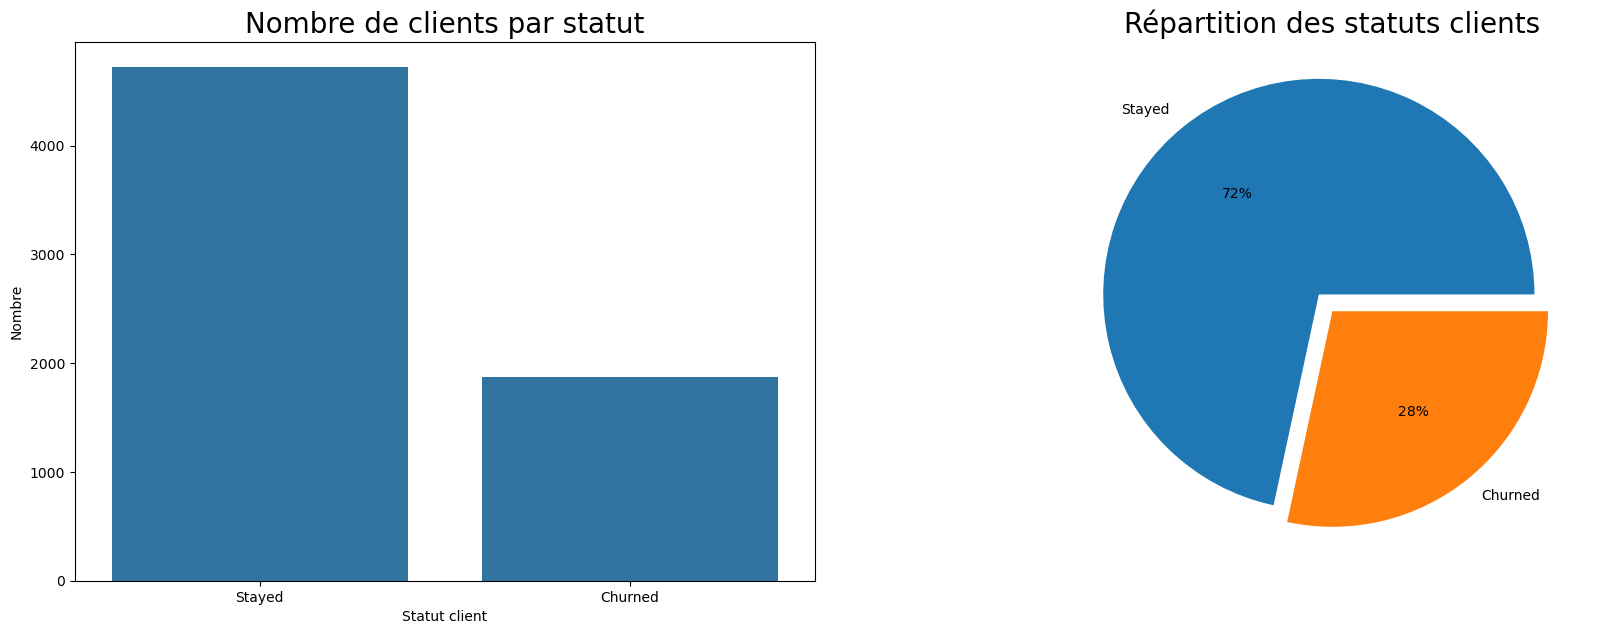

In [25]:
# Définition de la taille de la figure
plt.figure(figsize = (21, 7))

# Affichage du graphique en barres pour la colonne customer_status
plt.subplot(1, 2, 1)
sns.countplot(x = 'customer_status', data = df_cln)
plt.title('Nombre de clients par statut', fontsize = 20)
plt.xlabel('Statut client')
plt.ylabel('Nombre')

# Affichage du graphique circulaire (camembert) pour la colonne customer_status
plt.subplot(1, 2, 2)
plt.pie(df_cln['customer_status'].value_counts(), 
        labels = list(df_cln['customer_status'].value_counts().index), 
        autopct = '%1.0f%%', 
        explode = [0.1, 0])
plt.title('Répartition des statuts clients', fontsize = 20)


plt.show()


Le **churn** désigne les clients qui quittent un produit ou un service — c’est un peu comme de l’eau qui fuit d’un seau.
Le **taux de churn** correspond au nombre de clients perdus divisé par le nombre total de clients.


D’après le graphique ci-dessus, on observe que :

* **72 %** des clients **restent fidèles** à l’entreprise,
* Tandis que **28 %** décident de **partir**.

Cela semble **positif** du point de vue commercial, mais cela entraîne un **déséquilibre dans les données**, ce qui peut **fausser les résultats** lors de l’entraînement des modèles prédictifs.


### iv.ii Gender

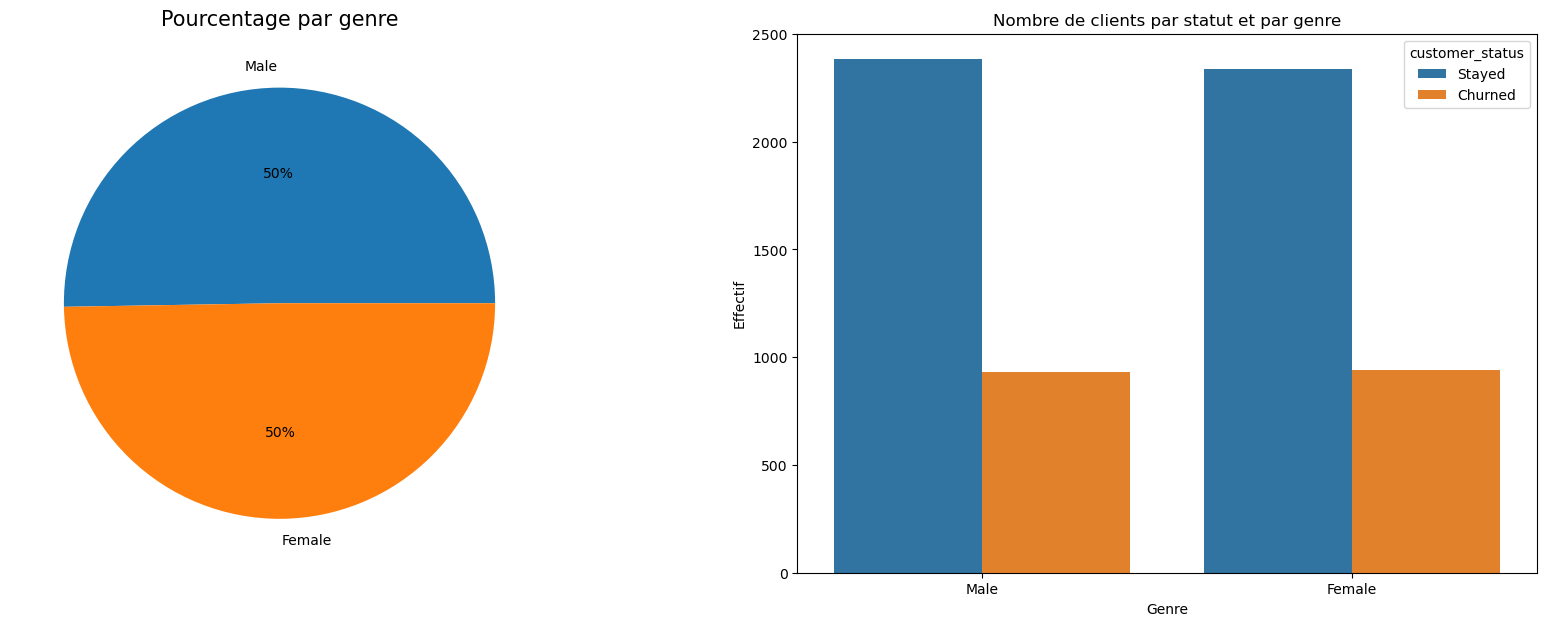

In [26]:
plt.figure(figsize=(21,7))

# Graphique circulaire (camembert) des pourcentages de genre
plt.subplot(1, 2, 1)
plt.pie(df_cln['gender'].value_counts(), 
        labels = list(df_cln['gender'].value_counts().index),
        autopct ='%1.0f%%')
plt.title('Pourcentage par genre', fontsize = 15)

# Diagramme en barres du genre selon le statut client
plt.subplot(1, 2, 2)
sns.countplot(x = 'gender', 
              data = df_cln, 
              hue = 'customer_status', 
              order = df_cln['gender'].value_counts().index)
plt.title('Nombre de clients par statut et par genre')
plt.xlabel('Genre')
plt.ylabel('Effectif')

# Afficher les graphiques
plt.show()


D’après les graphiques ci-dessus, on constate que le nombre de clients hommes et femmes est à peu près équivalent, ce qui indique une répartition équilibrée des genres.

De plus, il n’y a aucune corrélation évidente entre le genre et le churn : le taux de départ des clients ne semble pas être influencé de manière significative par le sexe.
Cela laisse penser que d’autres facteurs, comme  `age`, `marital status`, ou encore `offers` , pourraient avoir un impact plus fort sur le churn des clients.

### iv.iii Age

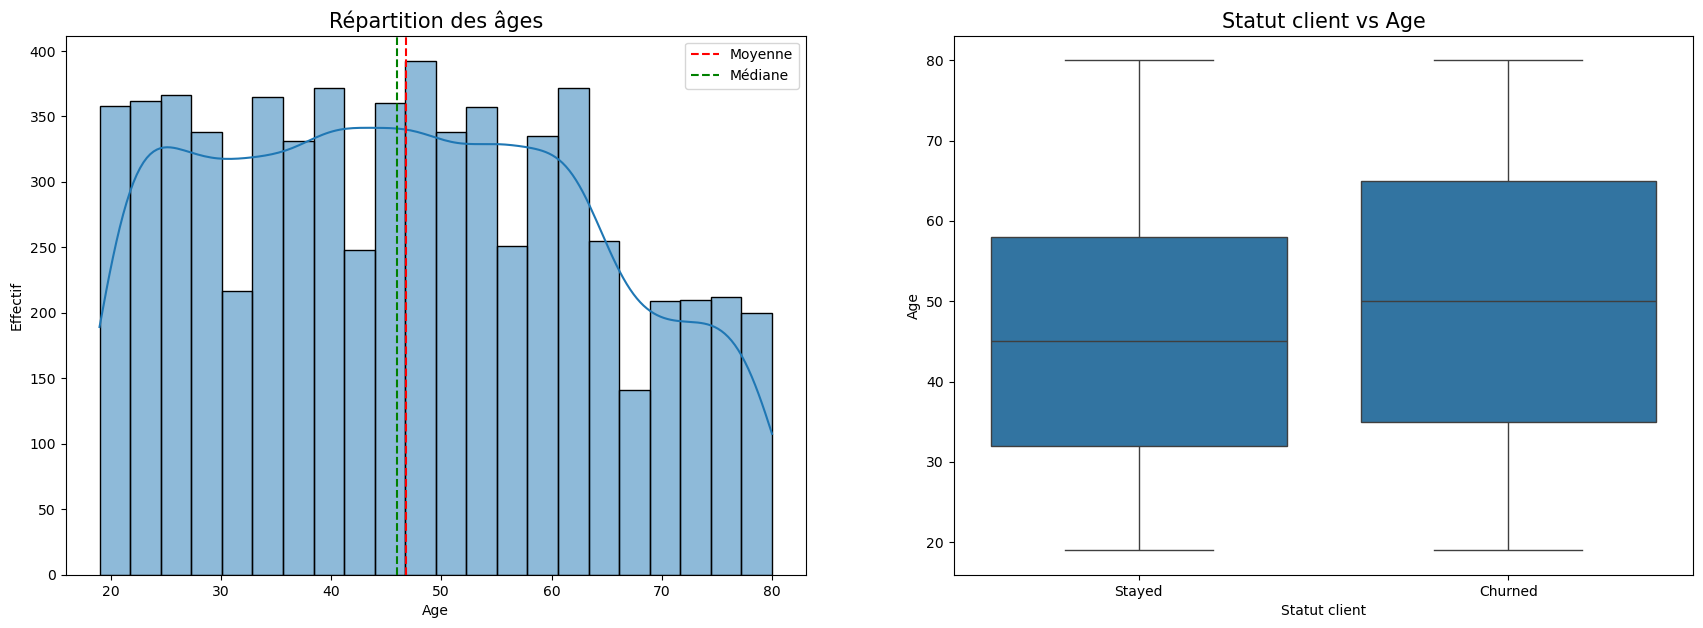

La valeur de l’asymétrie (skewness) de la colonne age est : 0.149
La valeur minimale de age est : 19
La valeur maximale de age est : 80


In [27]:
plt.figure(figsize = (21, 7))

# Histogramme de la distribution des âges
plt.subplot(1, 2, 1)
sns.histplot(x='age', data=df_cln, kde=True)  # kde=True pour tracer la courbe de densité
plt.axvline(df_cln.age.mean(), color='red', linestyle='--', label='Moyenne') 
plt.axvline(df_cln.age.median(), color='green', linestyle='--', label='Médiane') 
plt.title('Répartition des âges', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Effectif')
plt.legend()

# Diagramme en boîte (box plot) pour comparer Age et statut client
plt.subplot(1, 2, 2)
sns.boxplot(x='customer_status', y='age', data=df_cln)
plt.title('Statut client vs Age', fontsize=15)
plt.xlabel('Statut client')
plt.ylabel('Age')

plt.show()

# Vérification de l'asymétrie (skewness), valeur min et max de l'âge
print('La valeur de l’asymétrie (skewness) de la colonne age est :', df_cln.age.skew().round(3))
print('La valeur minimale de age est :', df_cln.age.min())
print('La valeur maximale de age est :', df_cln.age.max())


D’après le graphique, l’âge des clients varie de 19 à 80 ans.
La distribution des données dans la colonne age est symétrique, ce qui signifie qu’elle est uniformément répartie. La valeur de l’asymétrie (skewness) de 0,149 le confirme.

On remarque qu’il existe une corrélation entre l’âge et le churn :
les clients de plus de 60 ans ont tendance à se désabonner plus souvent, c’est-à-dire à arrêter d’utiliser le produit ou le service.

Cela suggère que les entreprises devraient prêter attention aux besoins et préférences des clients plus âgés afin de réduire le churn et de conserver leur fidélité.

### iv.iv Marital Status

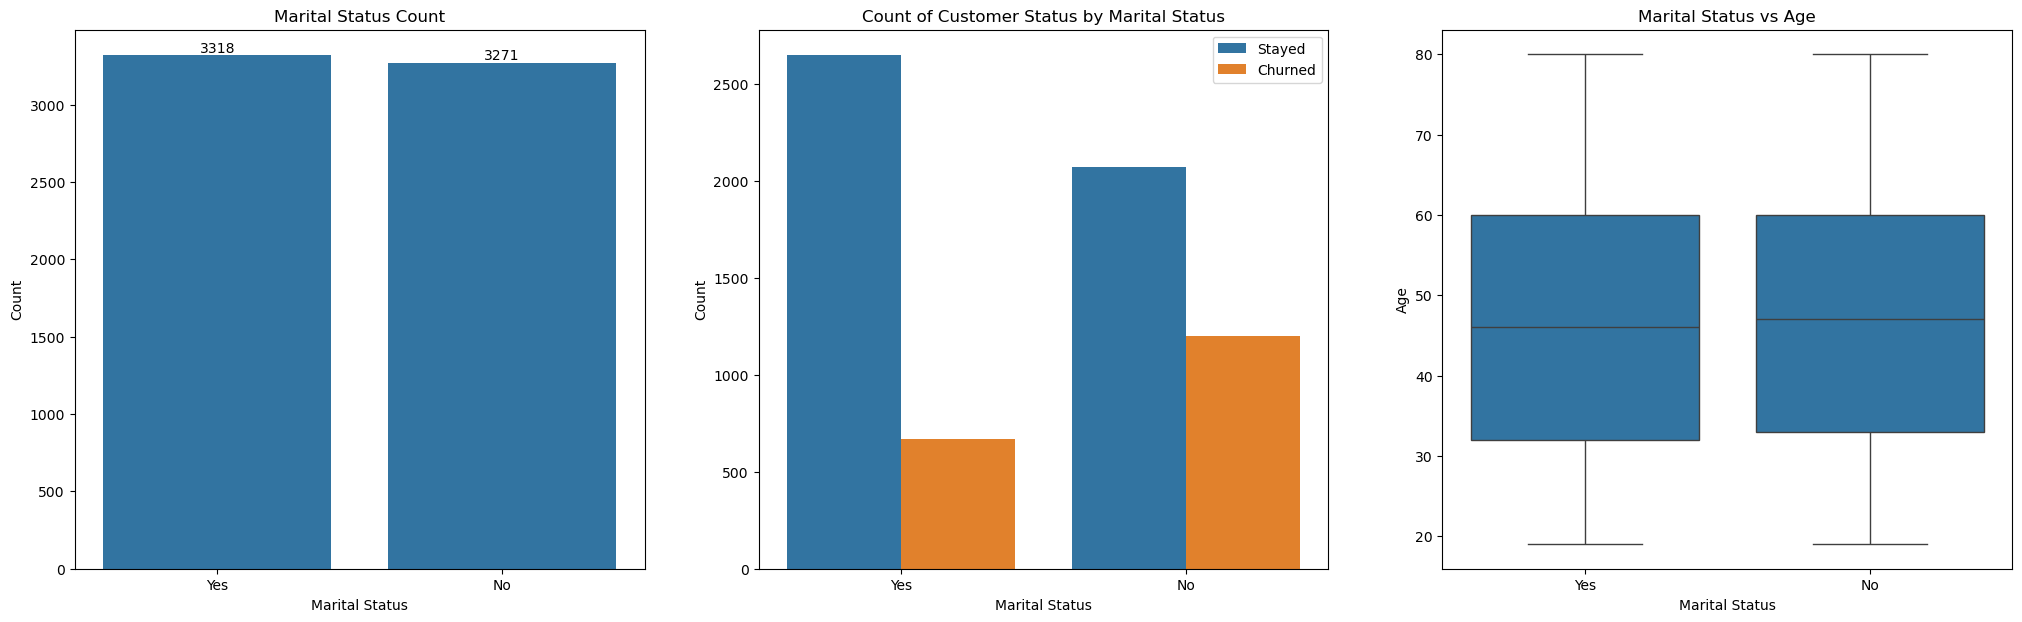

In [28]:

plt.figure(figsize = (25, 7))

# Diagramme en barres du statut marital
plt.subplot(1, 3, 1)
fig = sns.countplot(x = 'married', data = df_cln, order = df_cln.married.value_counts().index)

# Ajouter les valeurs au-dessus des barres
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width() / 2.,
             height + 20,
             '{:1.0f}'.format(height),
             ha = 'center')
plt.title('Marital Status Count')  
plt.xlabel('Marital Status')        
plt.ylabel('Count')               

# Diagramme en barres du statut client par statut marital
plt.subplot(1, 3, 2)
sns.countplot(x = 'married', 
              data = df_cln, 
              hue = 'customer_status', 
              order = df_cln['married'].value_counts().index)
plt.title('Count of Customer Status by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(loc='upper right')       

# Boxplot (âge vs statut marital)
plt.subplot(1, 3, 3)
sns.boxplot(x = 'married', y = 'age', data = df_cln)
plt.title('Marital Status vs Age')
plt.xlabel('Marital Status')
plt.ylabel('Age')


plt.show()


Le nombre de personnes mariées et non mariées est à peu près identique.
Les deux groupes se situent principalement dans la tranche d’âge de 30 à 60 ans.
Fait intéressant, les personnes mariées sont plus susceptibles de rester que celles qui ne le sont pas.

Cela indique que **le statut marital influence la rétention client.**
Pour fidéliser les clients, les entreprises devraient envisager de répondre aux besoins et préférences spécifiques des personnes mariées.

### iv.v Tenure

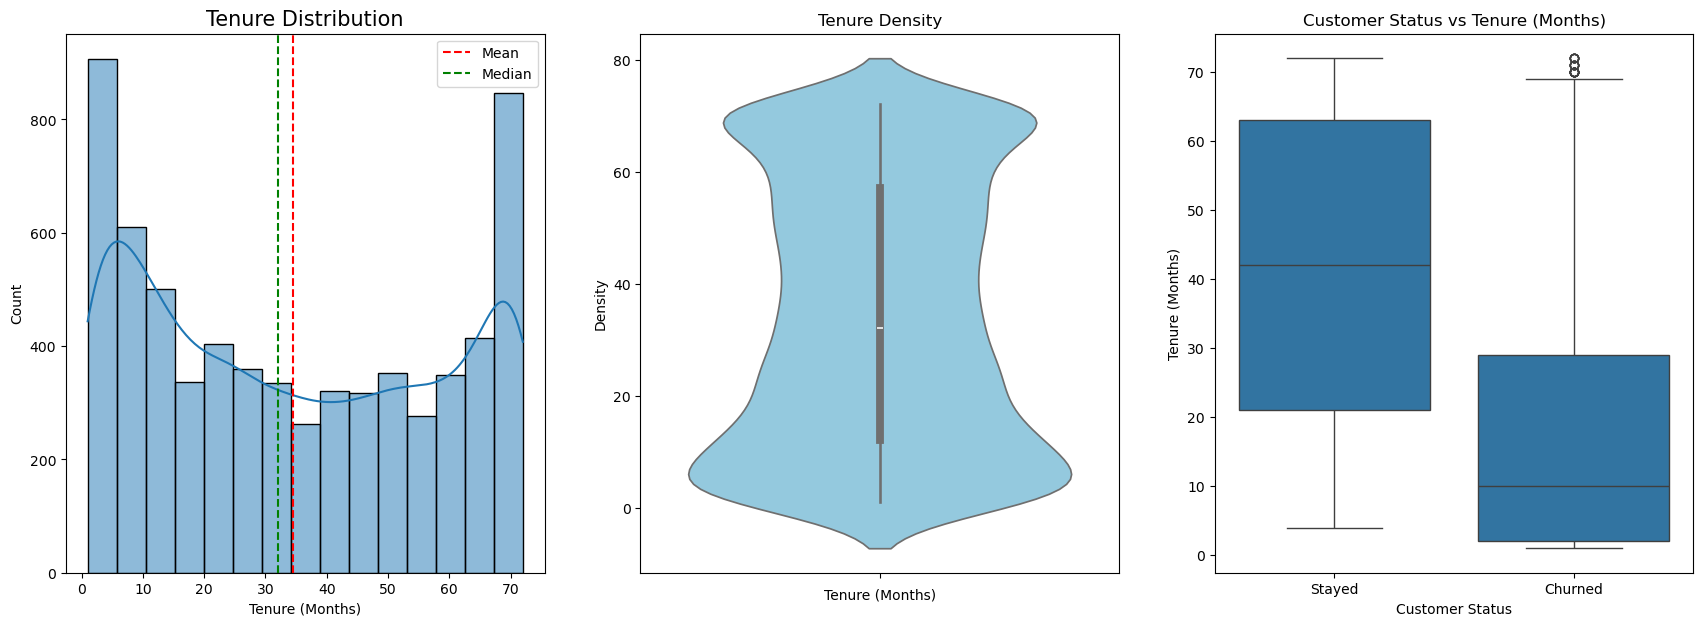

The skewness value of tenure column is: 0.155
The min value of tenure column is: 1
The max value of tenure column is: 72
The mean value of tenure column is: 34.0


In [29]:
plt.figure(figsize = (21, 7))

# Histogramme de la distribution de l'ancienneté (en mois)
plt.subplot(1, 3, 1)
sns.histplot(x = 'tenure_in_months', data = df_cln, kde = True)
plt.axvline(df_cln.tenure_in_months.mean(), color = 'red', linestyle = '--', label = 'Mean')      # Ligne moyenne
plt.axvline(df_cln.tenure_in_months.median(), color = 'green', linestyle = '--', label = 'Median') # Ligne médiane
plt.title('Tenure Distribution', fontsize = 15)
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.legend()

# Diagramme en violon pour visualiser la densité de l'ancienneté
plt.subplot(1, 3, 2)
sns.violinplot(data = df_cln, y = 'tenure_in_months', color='skyblue')
plt.title('Tenure Density')
plt.xlabel('Tenure (Months)')
plt.ylabel('Density')

# Boxplot de l'ancienneté selon le statut client
plt.subplot(1, 3, 3)
sns.boxplot(x = 'customer_status', y = 'tenure_in_months', data = df_cln)
plt.title('Customer Status vs Tenure (Months)')
plt.xlabel('Customer Status')
plt.ylabel('Tenure (Months)')


plt.show()

# Affichage des statistiques descriptives pour la colonne tenure_in_months
print('The skewness value of tenure column is:', df_cln.tenure_in_months.skew().round(3))   
print('The min value of tenure column is:', df_cln.tenure_in_months.min())                
print('The max value of tenure column is:', df_cln.tenure_in_months.max())                  
print('The mean value of tenure column is:', df_cln.tenure_in_months.mean().round(0))       

L’ancienneté des clients avec le service varie d’un minimum de 1 mois à un maximum de 72 mois, avec une moyenne de 35 mois.
Le graphique en violon montre que la plus forte concentration de clients se situe dans les 15 premiers mois.
On observe également une augmentation notable de l’ancienneté autour de 60 mois.

Par ailleurs, il existe une corrélation claire entre l’ancienneté et le statut client : plus les clients utilisent le service longtemps, plus ils sont susceptibles de rester. Cela suggère qu’avec le temps, l’expérience et l’engagement des clients renforcent leur fidélité, réduisant ainsi la probabilité de churn (résiliation).

### iv.vi Total Revenue

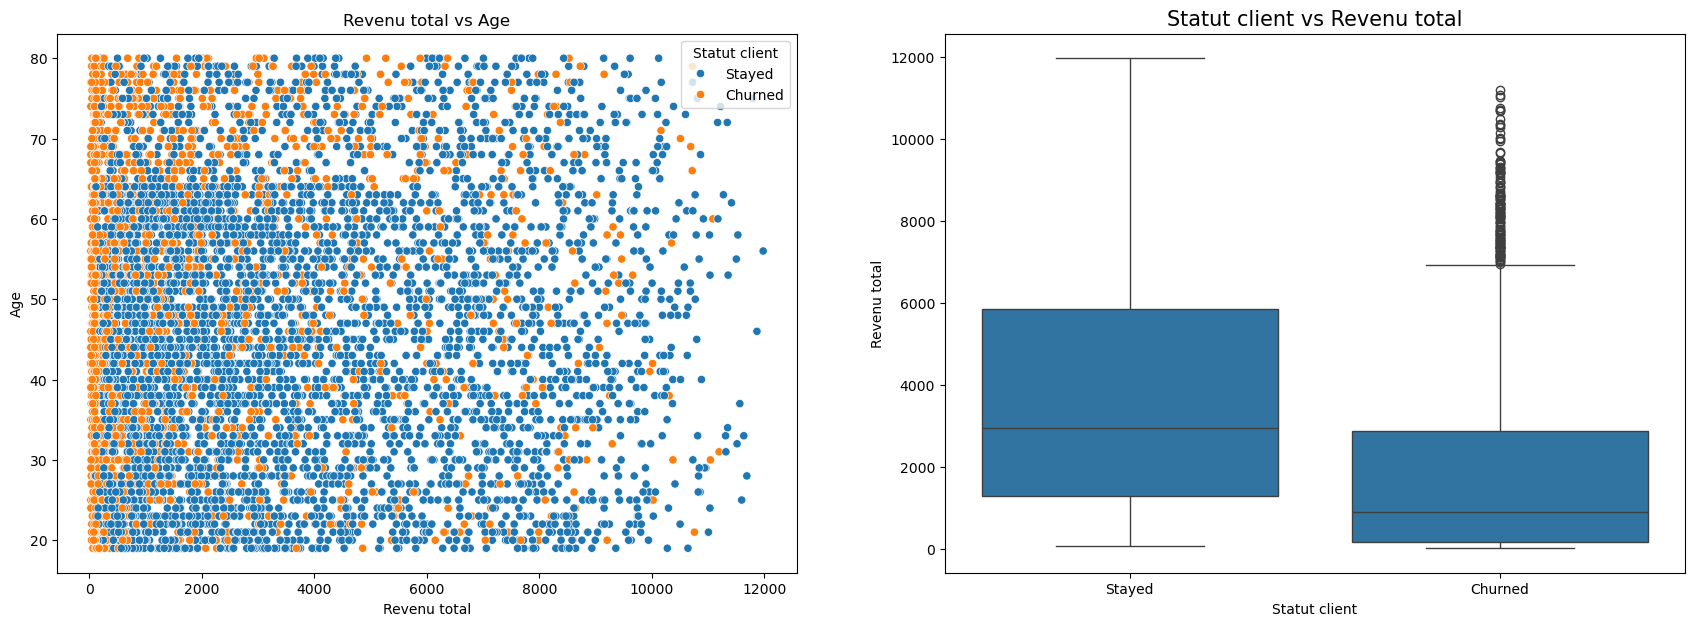

In [30]:
plt.figure(figsize = (21, 7))

# Nuage de points : Revenu total vs Age
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'total_revenue', 
                y = 'age', 
                hue = 'customer_status', 
                data = df_cln)
plt.legend(title = 'Statut client', loc = 'upper right')
plt.title('Revenu total vs Age')
plt.xlabel('Revenu total')
plt.ylabel('Age')

# Boîte à moustaches : Statut client vs Revenu total
plt.subplot(1, 2, 2)
sns.boxplot(x = 'customer_status', 
            y = 'total_revenue', 
            data = df_cln)
plt.title('Statut client vs Revenu total', fontsize = 15)
plt.xlabel('Statut client')
plt.ylabel('Revenu total')


plt.show()


Il existe une corrélation claire entre le revenu total généré par les clients et leur statut de churn.
En général, les clients avec un revenu total plus faible sont plus susceptibles de partir, tandis que ceux avec un revenu plus élevé ont tendance à rester.
Cela suggère que les clients qui contribuent moins financièrement présentent un risque plus élevé de cesser d’utiliser le service.

Cependant, il est important de noter qu’il existe certains valeurs aberrantes dans la catégorie des clients partis.
Ces outliers représentent des clients qui ont churné malgré un revenu total élevé.
Ces cas peuvent être influencés par d’autres facteurs tels que l’insatisfaction, l’évolution des besoins ou des circonstances externes.

### iv.vii Calcul du coefficient de corrélation

In [31]:
# # Séparation du jeu de données en 2 parties pour rendre la heat map plus lisible

df_cln_cor1 = df_cln[['gender', 'age', 'married', 'number_of_dependents', 'city','number_of_referrals',
                      'tenure_in_months', 'offer', 'phone_service', 'avg_monthly_long_distance_charges', 
                      'multiple_lines', 'internet_service', 'internet_type', 'avg_monthly_gb_download',
                      'online_security', 'customer_status']].reset_index(drop = True)

df_cln_cor2 = df_cln.drop(columns=['gender', 'age', 'married', 'number_of_dependents', 'city','number_of_referrals',
                      'tenure_in_months', 'offer', 'phone_service', 'avg_monthly_long_distance_charges', 
                      'multiple_lines', 'internet_service', 'internet_type', 'avg_monthly_gb_download',
                      'online_security']).reset_index(drop = True)

In [32]:
import phik
from phik.report import plot_correlation_matrix

interval columns not set, guessing: ['age', 'number_of_dependents', 'number_of_referrals', 'tenure_in_months', 'avg_monthly_long_distance_charges', 'avg_monthly_gb_download']


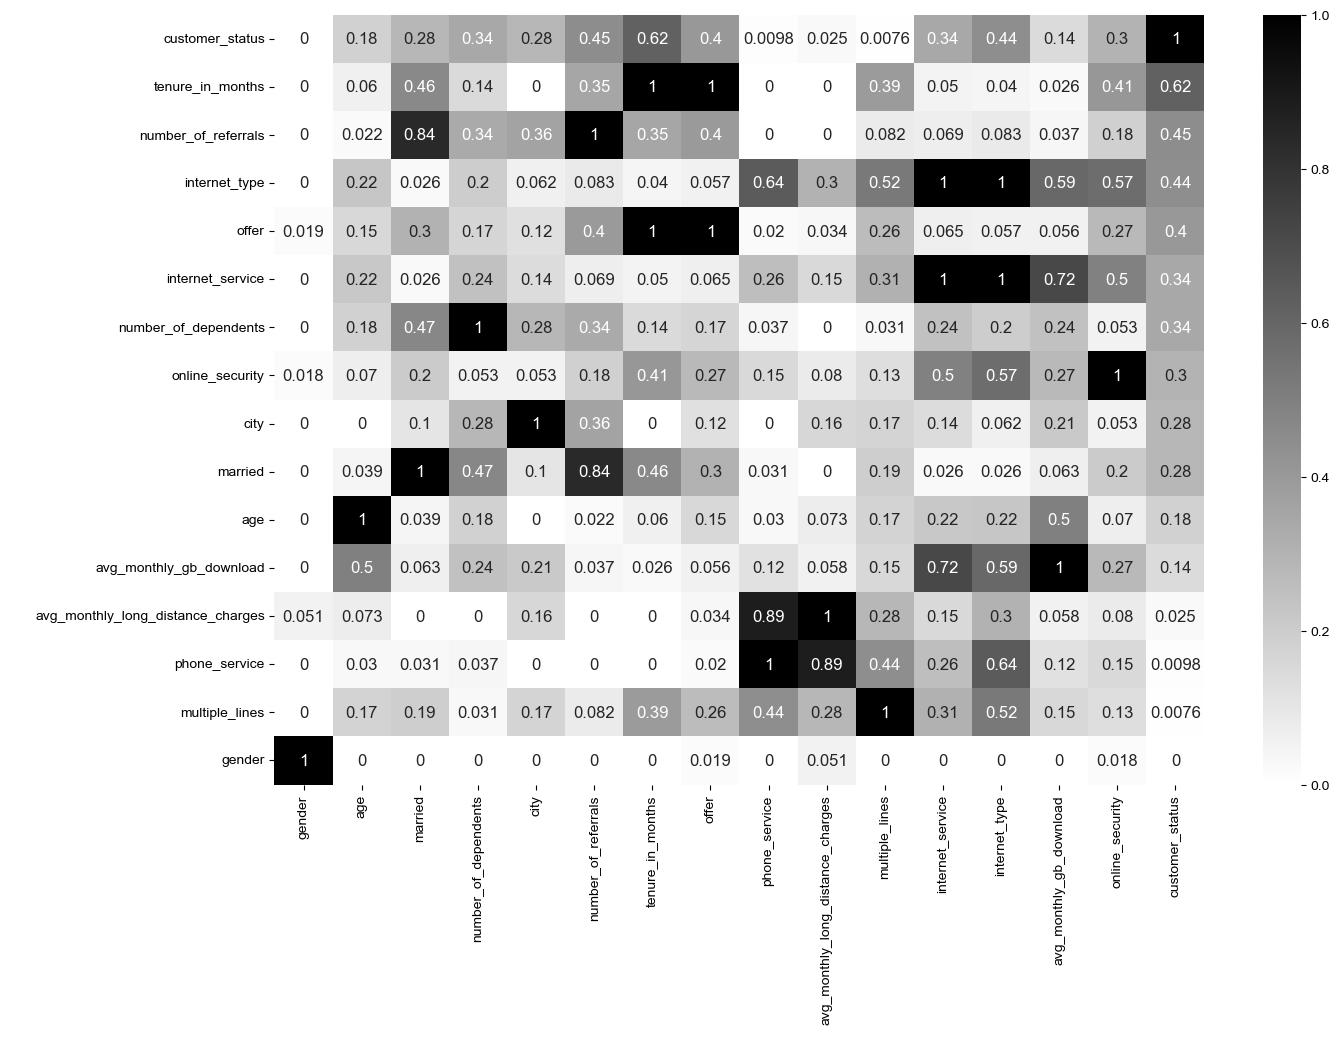

In [33]:
# Calcul de la matrice de corrélation pourdf_cln_cor1

cor_tbl_1 = df_cln_cor1.phik_matrix()
cor_tbl_1.sort_values(by=['customer_status'], ascending=False, inplace=True)

# Affichage de la heat map 

plt.figure(figsize=(15,10))
sns.heatmap(cor_tbl_1, annot = True, cmap = 'binary', cbar = True, annot_kws = {'size': 12})
sns.set(font_scale=1);

interval columns not set, guessing: ['monthly_charge', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue']


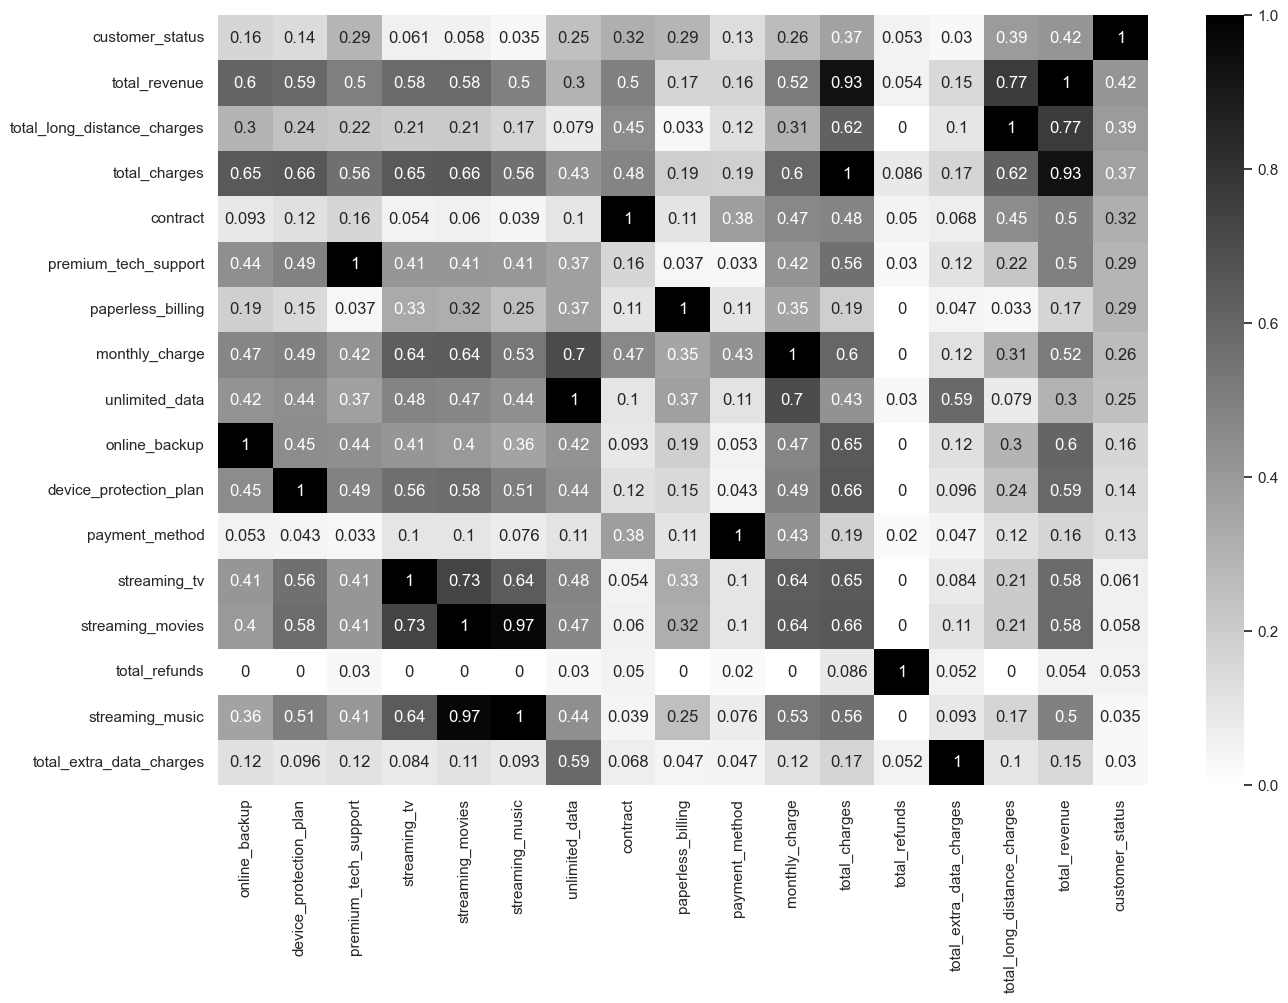

In [34]:
# Calcul de la matrice de corrélation pour df_cln_cor2

cor_tbl_2 = df_cln_cor2.phik_matrix()
cor_tbl_2.sort_values(by=['customer_status'], ascending=False, inplace=True)

# Affichage de la heat map 

plt.figure(figsize=(15,10))
sns.heatmap(cor_tbl_2, annot = True, cmap = 'binary', cbar = True, annot_kws = {'size': 12})
sns.set(font_scale=1);

D’après l’analyse de la carte de chaleur, plusieurs colonnes présentent des valeurs de corrélation supérieures à 20 %.
Pour optimiser le jeu de données, nous allons supprimer les colonnes peu pertinentes telles que `age`, `gender`, `total_refunds`, `payment_method`, ainsi que toutes les autres ayant une faible corrélation avec la variable cible.

En retirant ces colonnes, nous concentrons l’analyse sur les variables les plus significatives et fortement liées au résultat attendu.Cela permet de simplifier le jeu de données, de réduire le bruit et d’améliorer potentiellement la précision de l’analyse ou des modèles prédictifs.

### iv.viii  Cardinalité

Dans cette section, nous allons traiter le problème de forte cardinalité de la colonne `city`, qui contient plus de 1 000 valeurs uniques.
La présence d’un nombre aussi important de valeurs distinctes peut affecter les performances et entraîner des temps de traitement plus longs lors de l’encodage.

In [35]:
# Remplacement des villes apparaissant moins de 40 fois par "Others"

city_counts = df_cln['city'].value_counts()  
rare_cities = city_counts[city_counts < 40].index  

# Remplacement des villes rares par "Others"
df_cln.loc[df_cln['city'].isin(rare_cities), 'city'] = 'Others'


In [36]:
# Vérification du nombre d'occurrences de chaque ville

df_cln.city.value_counts()

city
Others           5431
San Diego         278
Los Angeles       275
San Jose          110
Sacramento        102
San Francisco      97
Fresno             61
Long Beach         58
Escondido          48
Oakland            47
Stockton           41
Fallbrook          41
Name: count, dtype: int64

## v. Feature Engineering

### v.i Sauvegarde des données pour l’inférence

Dans cette section, nous allons sauvegarder 89 échantillons issus du jeu de données principal.
Ces données serviront ultérieurement au processus d’inférence, c’est-à-dire pour tester le modèle après son entraînement et sa validation.

L’objectif est de mettre de côté un petit sous-ensemble représentatif qui ne sera pas utilisé dans la phase d’apprentissage, afin de vérifier la capacité du modèle à prédire correctement sur de nouvelles données jamais vues.

In [37]:
# Sauvegarde des données pour l’inférence

inference = df_cln.sample(89, random_state = 42)
inference.to_csv('Customer Churn Prediction Inference - ML.csv', index=False)

# suppression de ces 89 lignes du jeu de données principal pour éviter toute fuite de données

df_cln = df_cln.drop(inference.index)

inference

,gender,age,married,number_of_dependents,city,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,...,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status
1919,Male,56,No,0,Sacramento,0,2,Offer E,Yes,6.47,...,Month-to-Month,Yes,Bank Withdrawal,45.15,98.50,0.00,0,12.94,111.44,Churned
4041,Male,49,Yes,0,Others,10,26,NaN,Yes,45.28,...,One Year,Yes,Bank Withdrawal,20.05,505.90,0.00,0,1177.28,1683.18,Stayed
1452,Female,29,Yes,2,Others,10,69,NaN,No,0.00,...,Two Year,No,Bank Withdrawal,46.25,3121.40,0.00,0,0.00,3121.40,Stayed
2457,Male,66,Yes,0,Others,6,65,NaN,Yes,32.08,...,One Year,Yes,Bank Withdrawal,100.75,6674.65,0.00,0,2085.20,8759.85,Stayed
3764,Male,59,Yes,1,Others,11,43,NaN,Yes,42.22,...,One Year,Yes,Credit Card,-2.00,4013.80,25.49,0,1815.46,5803.77,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4679,Male,74,No,0,Others,0,47,NaN,Yes,14.78,...,Two Year,No,Bank Withdrawal,59.60,2754.00,0.00,0,694.66,3448.66,Stayed
4967,Male,74,Yes,0,San Jose,1,16,Offer D,Yes,26.12,...,Month-to-Month,Yes,Credit Card,74.30,1178.25,0.00,0,417.92,1596.17,Churned
2842,Male,41,Yes,2,Others,3,68,NaN,Yes,31.40,...,Two Year,Yes,Bank Withdrawal,105.25,7173.15,0.00,0,2135.20,9308.35,Stayed
3082,Male,68,Yes,0,Others,3,20,NaN,Yes,27.56,...,One Year,No,Bank Withdrawal,107.05,2172.05,0.00,0,551.20,2723.25,Stayed


### v.ii Découpage des données

In [38]:
# Remplacement des valeurs textuelles de la variable cible par des valeurs numériques

df_cln['customer_status'] = df_cln['customer_status'].map({'Churned' : 1, 'Stayed': 0})

df_cln.head()

,gender,age,married,number_of_dependents,city,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,...,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status
0,Female,37,Yes,0,Others,2,9,NaN,Yes,42.39,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,0
1,Male,46,No,0,Others,0,9,NaN,Yes,10.69,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,0
2,Male,50,No,0,Others,0,4,Offer E,Yes,33.65,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,1
3,Male,78,Yes,0,Others,1,13,Offer D,Yes,27.82,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,1
4,Female,75,Yes,0,Others,3,3,NaN,Yes,7.38,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,1


In [39]:
len(df_cln) 

6500

Nous allons diviser les données en un jeu d’entraînement (70 %) et un jeu de test (30 %).

In [40]:
# Division des données en jeu d'entraînement et jeu de test

X = df_cln.drop('customer_status', axis=1)
y = df_cln.customer_status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

# Affichage de la taille des différents jeux de données

for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(4550, 31)
(1950, 31)
(4550,)
(1950,)


### v.iii Sélection des variables

Dans cette section, nous allons sélectionner avec soin les colonnes qui seront utilisées comme variables explicatives (features) dans notre modèle.
En nous basant sur les calculs de corrélation précédents, nous avons identifié plusieurs colonnes à supprimer car :

- Elles présentent peu ou pas de corrélation significative avec la variable cible.

- Elles sont fortement corrélées avec d'autres variables, ce qui risque de provoquer de la multicolinéarité.

En éliminant ces colonnes, nous cherchons à améliorer les performances du modèle et à réduire les risques d’erreurs liées aux relations redondantes entre variables.


In [41]:
#  Suppression des colonnes inutiles

X_train = X_train.drop(columns=['age','avg_monthly_gb_download', 'avg_monthly_long_distance_charges', 'phone_service',
                                'multiple_lines','gender', 'online_backup', 'device_protection_plan', 'payment_method',
                                'total_extra_data_charges','streaming_tv', 'streaming_movies', 'streaming_music',
                                'total_refunds'], axis = 1).reset_index(drop = True)

X_test = X_test.drop(columns=['age','avg_monthly_gb_download', 'avg_monthly_long_distance_charges', 'phone_service',
                                'multiple_lines','gender', 'online_backup', 'device_protection_plan', 'payment_method',
                                'total_extra_data_charges','streaming_tv', 'streaming_movies', 'streaming_music',
                                'total_refunds'], axis = 1).reset_index(drop = True)


In [42]:
# Affichage des valeurs de X_train

X_train

,married,number_of_dependents,city,number_of_referrals,tenure_in_months,offer,internet_service,internet_type,online_security,premium_tech_support,unlimited_data,contract,paperless_billing,monthly_charge,total_charges,total_long_distance_charges,total_revenue
0,Yes,0,Others,1,8,NaN,Yes,Fiber Optic,No,No,Yes,Month-to-Month,Yes,84.00,613.40,368.40,981.80
1,Yes,0,Others,6,49,NaN,Yes,DSL,No,No,No,Month-to-Month,Yes,52.15,2583.75,1392.58,4026.33
2,No,0,Others,0,16,Offer D,No,None,No,No,No,Month-to-Month,No,20.25,327.45,336.64,664.09
3,No,0,Others,0,36,Offer C,Yes,DSL,No,Yes,No,One Year,Yes,70.70,2511.95,1053.72,3625.67
4,No,0,San Diego,0,1,NaN,Yes,Fiber Optic,Yes,No,Yes,Month-to-Month,Yes,73.60,73.60,6.19,79.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545,Yes,3,Others,1,16,Offer D,Yes,Cable,No,No,No,Month-to-Month,Yes,35.50,552.70,0.00,632.70
4546,Yes,0,Others,5,55,NaN,Yes,Cable,No,No,Yes,One Year,No,51.65,2838.55,1624.15,4462.70
4547,No,0,Others,0,70,NaN,Yes,Fiber Optic,Yes,No,Yes,Two Year,Yes,111.15,7737.55,1620.50,9311.79
4548,Yes,0,San Francisco,0,1,NaN,Yes,Fiber Optic,No,No,Yes,Month-to-Month,Yes,73.55,73.55,36.92,110.47


In [43]:
# Affichage des valeurs de X_test

X_test

,married,number_of_dependents,city,number_of_referrals,tenure_in_months,offer,internet_service,internet_type,online_security,premium_tech_support,unlimited_data,contract,paperless_billing,monthly_charge,total_charges,total_long_distance_charges,total_revenue
0,Yes,0,Others,1,56,NaN,Yes,Cable,Yes,Yes,Yes,One Year,Yes,68.45,4014.00,1501.92,5515.92
1,No,0,Others,0,51,NaN,No,None,No,No,No,Two Year,No,19.60,967.90,2420.46,3388.36
2,Yes,0,Others,1,62,Offer B,Yes,Cable,Yes,Yes,Yes,Two Year,Yes,84.95,5150.55,291.40,5437.27
3,No,0,Others,0,39,Offer C,Yes,DSL,No,Yes,Yes,Two Year,Yes,49.80,1971.15,153.27,2124.42
4,No,0,Others,0,72,NaN,Yes,Fiber Optic,Yes,Yes,Yes,Two Year,Yes,107.40,7748.75,2254.32,10003.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,Yes,2,Others,3,37,Offer C,Yes,Fiber Optic,No,No,Yes,Month-to-Month,Yes,88.80,3340.55,39.96,3380.51
1946,Yes,0,Others,1,18,Offer D,Yes,Fiber Optic,Yes,No,Yes,Month-to-Month,No,74.80,1438.05,779.22,2217.27
1947,Yes,2,Others,8,56,Offer B,Yes,Cable,Yes,Yes,Yes,One Year,Yes,52.00,2884.90,0.00,2884.90
1948,No,0,Others,0,66,NaN,Yes,DSL,Yes,Yes,Yes,Two Year,Yes,62.50,4136.40,0.00,4136.40


### v.iv Gestion des valeurs manquantes

Il n’y a plus de valeurs manquantes détectées dans ce jeu de données ; par conséquent, nous pouvons passer cette étape.

### v.v Gestion des valeurs aberrantes (Outlier Handling)

Dans cette section, notre objectif est d’identifier les valeurs aberrantes présentes dans chaque colonne numérique du jeu de données.
Nous adopterons une approche spécifique pour gérer ces outliers en limitant (« capping ») les valeurs qui se situent en dessous du seuil de 20 % du total des données, si nécessaire.

Cela sera réalisé à l’aide d’un pipeline pour automatiser le processus de détection et de limitation des valeurs aberrantes.
En appliquant cette technique, nous visons à réduire l’impact des outliers sur notre analyse tout en maintenant l’intégrité des données dans une plage acceptable.

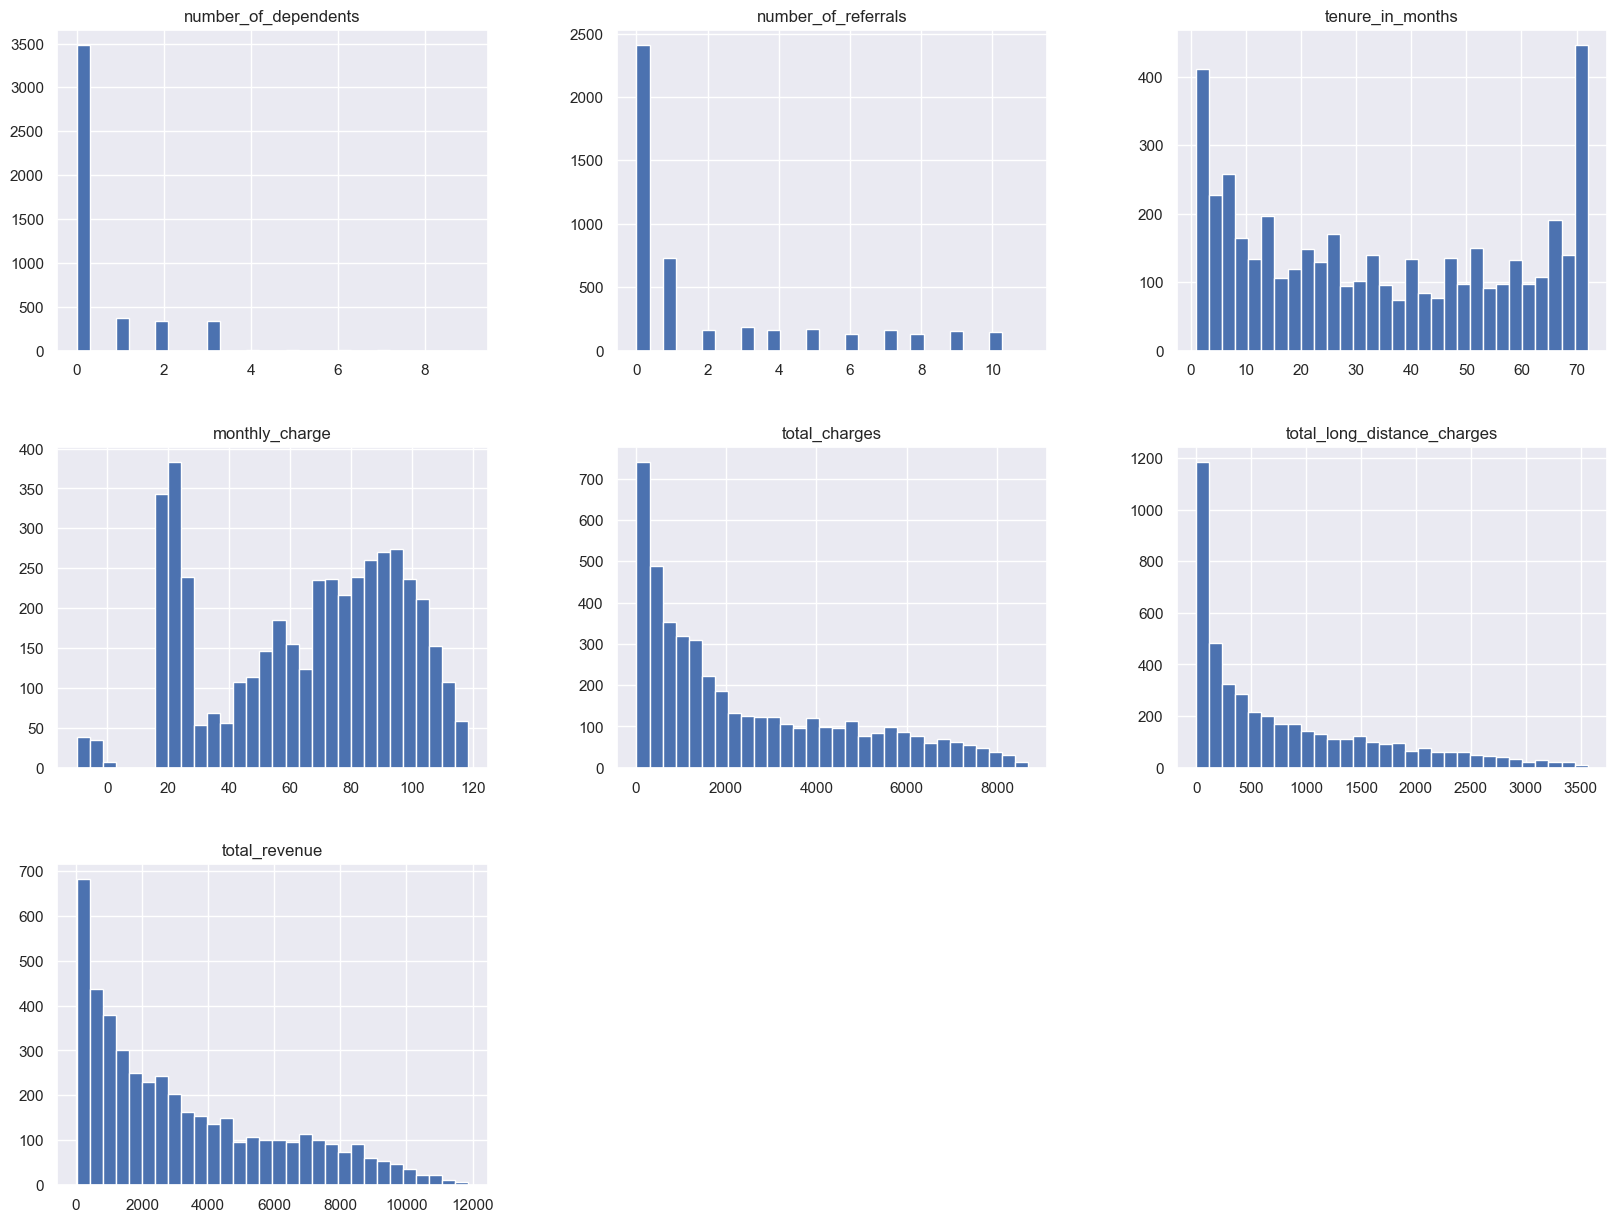

In [44]:
X_train.hist(bins=30, figsize=(20, 15))
plt.show()

In [45]:
# Fonction pour calculer le pourcentage de valeurs aberrantes 

def outlier_percent(X_train):
    Q1 = X_train.quantile(0.25)
    Q3 = X_train.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
    num_outliers =  np.sum((X_train < minimum) | (X_train > maximum))
    num_total = X_train.count()
    return (num_outliers/num_total)*100

# Boucle sur toutes les colonnes numériques

for column in X_train.select_dtypes(include='number').columns:
    percent = str(round(outlier_percent(X_train[column]), 2))
    print(f'Outliers in "{column}": {percent}%')

Outliers in "number_of_dependents": 23.47%
Outliers in "number_of_referrals": 9.47%
Outliers in "tenure_in_months": 0.0%
Outliers in "monthly_charge": 0.0%
Outliers in "total_charges": 0.0%
Outliers in "total_long_distance_charges": 1.96%
Outliers in "total_revenue": 0.09%


Seule la colonne `number_of_dependents` dépasse le seuil de 20 % de valeurs aberrantes détectées. 
Mais comme cette variable représente un nombre entier (comptage de personnes à charge) et non une mesure continue, le concept de "valeur aberrante" n’est pas forcément pertinent ici.

Du coup, on ne fera pas de traitement particulier pour cette colonne, car chaque valeur est un comptage valide.

### v.vi Scaling Type Detection

L’objectif ici est de vérifier la distribution des colonnes numériques afin de déterminer le type de scaler le plus approprié pour le prétraitement des données.

In [46]:
# Vérification de la valeur d'asymétrie (skewness) pour chaque colonne numérique

for skew in df_cln.select_dtypes(include='number').columns:
    print(f'Skewness value in "{skew}": ', round(df_cln[skew].skew(), 2))

Skewness value in "age":  0.15
Skewness value in "number_of_dependents":  2.1
Skewness value in "number_of_referrals":  1.4
Skewness value in "tenure_in_months":  0.15
Skewness value in "avg_monthly_long_distance_charges":  0.05
Skewness value in "avg_monthly_gb_download":  1.2
Skewness value in "monthly_charge":  -0.34
Skewness value in "total_charges":  0.89
Skewness value in "total_refunds":  4.17
Skewness value in "total_extra_data_charges":  3.96
Skewness value in "total_long_distance_charges":  1.16
Skewness value in "total_revenue":  0.85
Skewness value in "customer_status":  0.96


Il a été montré que la plupart des colonnes sont fortement asymétriques, c’est pourquoi nous allons utiliser le PowerTransformer comme méthode de mise à l’échelle.

Le **PowerTransformer** est une transformation non linéaire qui permet de transformer des données asymétriques pour les rapprocher d’une distribution normale. Cela peut améliorer la précision des modèles de machine learning entraînés sur ces données.

### v.vii Pipeline

Il s’agit ici d’une tentative de création d’un pipeline afin de gagner du temps et de réduire les efforts.
L’automatisation est un outil puissant qui peut améliorer l’efficacité et la précision de notre travail.
Dans ce cas, nous automatisons le processus de gestion des valeurs aberrantes et de mise à l’échelle des données.
Cela nous permettra d’entraîner des modèles de machine learning plus précis.


In [47]:
# pipeline pour colonnes numériques

num_pipeline = Pipeline([
        ('scaler', PowerTransformer()),
        ('pca', PCA(n_components=.9, random_state = 42))
    ])

num_tr = num_pipeline.fit_transform(X_train.select_dtypes(include='number'))

In [48]:
# pipeline pour les colonnes catégorielles avec un One Hot Encoder

ohe_pipeline = Pipeline([
        ('ohe', OneHotEncoder(sparse=False)),
        ('pca', PCA(n_components=.9, random_state = 42))
    ])

ohe_tr = ohe_pipeline.fit_transform(X_train[['city']])

In [70]:
# pipeline pour les colonnes catégorielles avec encodage ordinal
from sklearn.impute import SimpleImputer

mar_order = ['No', 'Yes']
prem_order = ['No', 'Yes']
unl_order = ['No', 'Yes']
ppr_order = ['No', 'Yes']
int_order = ['No', 'Yes']
sec_order = ['No', 'Yes']
of_order = ['Offer A', 'Offer B', 'Offer C', 'Offer D', 'Offer E', 'None']
typ_order = ['Fiber Optic', 'Cable', 'DSL', 'None']
con_order = ['Two Year', 'One Year', 'Month-to-Month']

ord_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # 
    ('ordinal', OrdinalEncoder(
        categories=[mar_order, of_order, int_order, typ_order, sec_order,
                    prem_order, unl_order, con_order, ppr_order],
        handle_unknown='use_encoded_value', unknown_value=-1  # 
    )),
    ('pca', PCA(n_components=.9, random_state=42))
])

ord_tr = ord_pipeline.fit_transform(
    X_train.select_dtypes(include='object').drop(columns=['city'])
)


In [50]:
# Combinaison de tous les pipelines en un seul

preprocess = ColumnTransformer([
        ("num", num_pipeline, ['number_of_dependents', 'number_of_referrals', 'tenure_in_months','monthly_charge',
                               'total_charges', 'total_long_distance_charges', 'total_revenue']),
        ("ohe", ohe_pipeline, ['city']),
        ("ord", ord_pipeline, ['married', 'offer', 'internet_service', 'internet_type','online_security',
                                'premium_tech_support', 'unlimited_data', 'contract', 'paperless_billing'])
    ])

In [52]:
# Création du pipeline de prétraitement avec rééchantillonnage

resample = Pipeline([   
        ('preprocess', preprocess),
        ('over', SMOTENC([num for num in range(7, 16)], sampling_strategy = 0.5, random_state = 42)),
        ('under', RandomUnderSampler(random_state = 42))
])

In [53]:
# Application du rééchantillonnage sur X_train et y_train

X_train_final, y_train_final = resample.fit_resample(X_train, y_train)

In [54]:
# Application du prétraitement sur X_test

X_test_final = preprocess.transform(X_test)

In [55]:
# Affichage des effectifs de y_train avant rééchantillonnage

y_train.value_counts()

customer_status
0    3258
1    1292
Name: count, dtype: int64

In [56]:
# Affichage des effectifs de y_train après rééchantillonnage

y_train_final.value_counts()

customer_status
0    1629
1    1629
Name: count, dtype: int64

## vi. Definition  du modele 

Ici,nous devons créer des modèles en utilisant **Logistic Regression, SVC, Random Forest, KNN, et Naive Bayes.**

In [57]:
# Definition des modeles 

logreg = LogisticRegression(random_state=42)
svc = SVC(random_state=42)
ranfor = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
nvebys = GaussianNB()

Combinaison du prétraitement et du processus de modélisation dans un pipeline.

In [58]:
# Logistic Regression Pipeline

logreg_pipe = Pipeline([   
        ('preprocessing', preprocess),
        ('over', SMOTENC([num for num in range(7, 16)], sampling_strategy = 0.5, random_state = 42)),
        ('under', RandomUnderSampler(random_state = 42)),
        ('classifier', LogisticRegression(random_state = 42))
        ])

# Support Vector Machine Pipeline

svc_pipe = Pipeline([   
        ('preprocessing', preprocess),
        ('over', SMOTENC([num for num in range(7, 16)], sampling_strategy = 0.5, random_state = 42)),
        ('under', RandomUnderSampler(random_state = 42)),
        ('classifier', SVC(random_state = 42))
        ])

# Random Forest Pipeline

ranfor_pipe = Pipeline([   
        ('preprocessing', preprocess),
        ('over', SMOTENC([num for num in range(7, 16)], sampling_strategy = 0.5, random_state = 42)),
        ('under', RandomUnderSampler(random_state = 42)),
        ('classifier', RandomForestClassifier(random_state = 42))
        ])

# K-Nearest Neighbors Pipeline

knn_pipe = Pipeline([   
        ('preprocessing', preprocess),
        ('over', SMOTENC([num for num in range(7, 16)], sampling_strategy = 0.5, random_state = 42)),
        ('under', RandomUnderSampler(random_state = 42)),
        ('classifier', KNeighborsClassifier())
        ])

# Naive Bayes Pipeline

nvebys_pipe = Pipeline([   
        ('preprocessing', preprocess),
        ('over', SMOTENC([num for num in range(7, 16)], sampling_strategy = 0.5, random_state = 42)),
        ('under', RandomUnderSampler(random_state = 42)),
        ('classifier', GaussianNB())
        ])

## vii. Entraînement des modèles

De manière générale, l’objectif de l’entraînement d’un modèle est de :

- bien généraliser sur de nouvelles données,

- prédire ou classifier avec précision de nouveaux points de données,

- et permettre la prise de décision basée sur ces prédictions.

Dans cette section, tous les modèles de base seront entraînés

In [59]:
# Entraînement du modèle de régression logistique

logreg.fit(X_train_final, y_train_final)

LogisticRegression(random_state=42)

In [60]:
# Entraînement du modèle SVC

svc.fit(X_train_final, y_train_final)

SVC(random_state=42)

In [61]:
# Entraînement du modèle Random Forest

ranfor.fit(X_train_final, y_train_final)

RandomForestClassifier(random_state=42)

In [62]:
# Entraînement du modèle KNN

knn.fit(X_train_final, y_train_final)

KNeighborsClassifier()

In [63]:
# Entraînement du modèle Naive Bayes

nvebys.fit(X_train_final, y_train_final)

GaussianNB()

## viii. Évaluation des modèles

### viii.i Prédiction et Cross Validation

In [64]:
# prediction avec Logistic Regression

logreg_train = logreg.predict(X_train_final)
logreg_test = logreg.predict(X_test_final)

print('Classification report for Logistic Regression train-set:')
print('')
print(classification_report(y_train_final, logreg_train))
print('*'*55)
print('Classification report for Logistic Regression test-set:')
print('')
print(classification_report(y_test, logreg_test))

Classification report for Logistic Regression train-set:

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1629
           1       0.81      0.86      0.83      1629

    accuracy                           0.83      3258
   macro avg       0.83      0.83      0.83      3258
weighted avg       0.83      0.83      0.83      3258

*******************************************************
Classification report for Logistic Regression test-set:

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1396
           1       0.64      0.87      0.74       554

    accuracy                           0.83      1950
   macro avg       0.79      0.84      0.80      1950
weighted avg       0.86      0.83      0.83      1950



In [65]:
# cross validation avec Logistic Regression

logreg_scores = cross_val_score(logreg_pipe, X_train, y_train,
                         scoring="recall", cv=10)

print(f'Recall cross validation values for Logistic Regression (10 times validations): \n{logreg_scores}')
print('')
print(f'Recall cross validation mean value for Logistic Regression: {logreg_scores.mean().round(2)}')
print(f'Recall cross validation standard deviation value for Logistic Regression: {logreg_scores.std().round(2)}')
print('Recall cross validation range value for Logistic Regression: ', (logreg_scores.mean().round(2) - logreg_scores.std().round(2)) , '-', (logreg_scores.mean().round(2) + logreg_scores.std().round(2)))

Recall cross validation values for Logistic Regression (10 times validations): 
[0.85384615 0.85384615 0.89147287 0.82170543 0.86821705 0.8372093
 0.81395349 0.84496124 0.78294574 0.86046512]

Recall cross validation mean value for Logistic Regression: 0.84
Recall cross validation standard deviation value for Logistic Regression: 0.03
Recall cross validation range value for Logistic Regression:  0.8099999999999999 - 0.87


---

In [66]:
# predict avec SVC

svc_train = svc.predict(X_train_final)
svc_test = svc.predict(X_test_final)

print('Classification report for SVC train-set:')
print('')
print(classification_report(y_train_final, svc_train))
print('*'*55)
print('Classification report for SVC test-set:')
print('')
print(classification_report(y_test, svc_test))

Classification report for SVC train-set:

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1629
           1       0.85      0.87      0.86      1629

    accuracy                           0.86      3258
   macro avg       0.86      0.86      0.86      3258
weighted avg       0.86      0.86      0.86      3258

*******************************************************
Classification report for SVC test-set:

              precision    recall  f1-score   support

           0       0.93      0.84      0.89      1396
           1       0.68      0.85      0.76       554

    accuracy                           0.85      1950
   macro avg       0.81      0.85      0.82      1950
weighted avg       0.86      0.85      0.85      1950



In [67]:
# cross validation avec SVC

svc_scores = cross_val_score(svc_pipe, X_train, y_train,
                         scoring="recall", cv=10)

print(f'Recall cross validation values for SVC (10 times validations): \n{svc_scores}')
print('')
print(f'Recall cross validation mean value for SVC: {svc_scores.mean().round(2)}')
print(f'Recall cross validation standard deviation value for SVC: {svc_scores.std().round(2)}')
print('Recall cross validation range value for SVC: ', (svc_scores.mean().round(2) - svc_scores.std().round(2)) , '-', (svc_scores.mean().round(2) + svc_scores.std().round(2)))

Recall cross validation values for SVC (10 times validations): 
[0.82307692 0.83846154 0.89147287 0.82170543 0.84496124 0.85271318
 0.79069767 0.88372093 0.80620155 0.89147287]

Recall cross validation mean value for SVC: 0.84
Recall cross validation standard deviation value for SVC: 0.03
Recall cross validation range value for SVC:  0.8099999999999999 - 0.87


In [68]:
# prediction avec Random Forest

ranfor_train = ranfor.predict(X_train_final)
ranfor_test = ranfor.predict(X_test_final)

print('Classification report for Random Forest train-set:')
print('')
print(classification_report(y_train_final, ranfor_train))
print('*'*55)
print('Classification report for Random Forest test-set:')
print('')
print(classification_report(y_test, ranfor_test))

Classification report for Random Forest train-set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1629
           1       1.00      1.00      1.00      1629

    accuracy                           1.00      3258
   macro avg       1.00      1.00      1.00      3258
weighted avg       1.00      1.00      1.00      3258

*******************************************************
Classification report for Random Forest test-set:

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      1396
           1       0.70      0.83      0.76       554

    accuracy                           0.85      1950
   macro avg       0.81      0.84      0.82      1950
weighted avg       0.86      0.85      0.85      1950



In [69]:
# cross validation avec Random Forest

ranfor_scores = cross_val_score(ranfor_pipe, X_train, y_train,
                         scoring="recall", cv=10)

print(f'Recall cross validation values for Random Forest (10 times validations): \n{ranfor_scores}')
print('')
print(f'Recall cross validation mean value for Random Forest: {ranfor_scores.mean().round(2)}')
print(f'Recall cross validation standard deviation value for Random Forest: {ranfor_scores.std().round(2)}')
print('Recall cross validation range value for Random Forest: ', (ranfor_scores.mean().round(2) - ranfor_scores.std().round(2)) , '-', (ranfor_scores.mean().round(2) + ranfor_scores.std().round(2)))

Recall cross validation values for Random Forest (10 times validations): 
[0.76923077 0.78461538 0.80620155 0.82170543 0.82945736 0.78294574
 0.80620155 0.88372093 0.76744186 0.78294574]

Recall cross validation mean value for Random Forest: 0.8
Recall cross validation standard deviation value for Random Forest: 0.03
Recall cross validation range value for Random Forest:  0.77 - 0.8300000000000001


---

In [71]:
# prediction avec KNN

knn_train = knn.predict(X_train_final)
knn_test = knn.predict(X_test_final)

print('Classification report for KNN train-set:')
print('')
print(classification_report(y_train_final, knn_train))
print('*'*55)
print('Classification report for KNN test-set:')
print('')
print(classification_report(y_test, knn_test))

Classification report for KNN train-set:

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1629
           1       0.87      0.89      0.88      1629

    accuracy                           0.88      3258
   macro avg       0.88      0.88      0.88      3258
weighted avg       0.88      0.88      0.88      3258

*******************************************************
Classification report for KNN test-set:

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1396
           1       0.65      0.82      0.73       554

    accuracy                           0.82      1950
   macro avg       0.78      0.82      0.80      1950
weighted avg       0.84      0.82      0.83      1950



In [72]:
# cross validation avec KNN

knn_scores = cross_val_score(knn_pipe, X_train, y_train,
                         scoring="recall", cv=10)

print(f'Recall cross validation values for KNN (10 times validations): \n{knn_scores}')
print('')
print(f'Recall cross validation mean value for KNN: {knn_scores.mean().round(2)}')
print(f'Recall cross validation standard deviation value for KNN: {knn_scores.std().round(2)}')
print('Recall cross validation range value for KNN: ', (knn_scores.mean().round(2) - knn_scores.std().round(2)) , '-', (knn_scores.mean().round(2) + knn_scores.std().round(2)))

Recall cross validation values for KNN (10 times validations): 
[0.8        0.81538462 0.86821705 0.82170543 0.8372093  0.76744186
 0.8372093  0.82170543 0.78294574 0.79844961]

Recall cross validation mean value for KNN: 0.82
Recall cross validation standard deviation value for KNN: 0.03
Recall cross validation range value for KNN:  0.7899999999999999 - 0.85


In [73]:
# prediction avec Naive Bayes

nvebys_train = nvebys.predict(X_train_final)
nvebys_test = nvebys.predict(X_test_final)

print('Classification report for Naive Bayes train-set:')
print('')
print(classification_report(y_train_final, nvebys_train))
print('*'*55)
print('Classification report for Naive Bayes test-set:')
print('')
print(classification_report(y_test, nvebys_test))

Classification report for Naive Bayes train-set:

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1629
           1       0.79      0.81      0.80      1629

    accuracy                           0.79      3258
   macro avg       0.79      0.79      0.79      3258
weighted avg       0.79      0.79      0.79      3258

*******************************************************
Classification report for Naive Bayes test-set:

              precision    recall  f1-score   support

           0       0.91      0.79      0.85      1396
           1       0.61      0.81      0.69       554

    accuracy                           0.80      1950
   macro avg       0.76      0.80      0.77      1950
weighted avg       0.83      0.80      0.80      1950



In [74]:
# cross validation avec Naive Bayes

nvebys_scores = cross_val_score(nvebys_pipe, X_train, y_train,
                         scoring="recall", cv=10)

print(f'Recall cross validation values for Naive Bayes (10 times validations): \n{nvebys_scores}')
print('')
print(f'Recall cross validation mean value for Naive Bayes: {nvebys_scores.mean().round(2)}')
print(f'Recall cross validation standard deviation value for Naive Bayes: {nvebys_scores.std().round(2)}')
print('Recall cross validation range value for Naive Bayes: ', (nvebys_scores.mean().round(2) - nvebys_scores.std().round(2)) , '-', (nvebys_scores.mean().round(2) + nvebys_scores.std().round(2)))

Recall cross validation values for Naive Bayes (10 times validations): 
[0.76923077 0.82307692 0.80620155 0.76744186 0.82945736 0.79069767
 0.79844961 0.79069767 0.74418605 0.76744186]

Recall cross validation mean value for Naive Bayes: 0.79
Recall cross validation standard deviation value for Naive Bayes: 0.03
Recall cross validation range value for Naive Bayes:  0.76 - 0.8200000000000001


In [75]:
# sauvegarde des valeurs des cross validation dans un dataframe

cv_data = [{'Model': 'Logistic Regression', 'Recall' : logreg_scores.mean().round(3), 'Std. Dev' : logreg_scores.std().round(2)},
             {'Model': 'SVC', 'Recall' : svc_scores.mean().round(3), 'Std. Dev' : svc_scores.std().round(2)},
             {'Model': 'Random Forest', 'Recall' : ranfor_scores.mean().round(3), 'Std. Dev' : ranfor_scores.std().round(2)},
             {'Model': 'KNN', 'Recall' : knn_scores.mean().round(3), 'Std. Dev' : knn_scores.std().round(2)},
             {'Model': 'Naive Bayes', 'Recall' : nvebys_scores.mean().round(3), 'Std. Dev' : nvebys_scores.std().round(2)}
]

cv_score = pd.DataFrame(cv_data).sort_values(by = 'Recall', ascending = False)

cv_score

,Model,Recall,Std. Dev
1,SVC,0.844,0.03
0,Logistic Regression,0.843,0.03
3,KNN,0.815,0.03
2,Random Forest,0.803,0.03
4,Naive Bayes,0.789,0.03


Dans le dernier processus, nous avons exécuté et réalisé une validation croisée pour tous les modèles afin d’obtenir les métriques de performance pour chacun. Dans ce cas, notre attention est portée sur le rappel (recall) plutôt que sur la précision (accuracy) ou la précision (precision). Notre objectif est de minimiser les faux négatifs et de nous assurer que toutes les instances positives soient correctement identifiées.

Par exemple, lorsque la valeur de customer_status est Churned, cela signifie que nous prévoyons que la personne arrêtera d’utiliser le service. En revanche, Stayed signifie que nous prévoyons que cette personne continuera à utiliser le service.

Dans ce cas, notre faux négatif correspond à une prédiction Stayed (0) alors qu’en réalité, cette personne sera le prochain client à Churned (1) sur la plateforme. C’est pourquoi nous utilisons la valeur de rappel comme référence de performance.

En se référant aux rapports ci-dessus, nous avons vu les rapports de classification pour les ensembles d’entraînement et de test de tous les modèles. Sans oublier que les rapports de validation croisée pour tous les modèles sont également présentés. En examinant de nouveau tous ces rapports de validation croisée, nous pouvons extraire la moyenne et l’écart type des valeurs de rappel pour tous les modèles.

La régression logistique a produit la meilleure valeur de rappel pour ce cas, avec 0,840 et un écart type de 0,03. En deuxième place, SVC obtient un rappel de 0,831 et un écart type de 0,03. En dernière place, Naive Bayes affiche un rappel de 0,788 et un écart type de 0,03. KNN et Random Forest se placent respectivement en troisième et quatrième positions.

De manière générale, tous les modèles sauf Random Forest présentent un bon ajustement statistique. Bien que le modèle de régression logistique affiche la valeur de rappel la plus élevée, nous avons choisi de ne pas l’optimiser davantage. Nous constatons que SVC offre des résultats plus équilibrés entre les classes 0 et 1. De plus, la différence de rappel entre les deux modèles est minime. Par conséquent, nous allons nous concentrer sur l’optimisation de SVC, car il semble prometteur pour capturer efficacement les tendances sous-jacentes et bien généraliser sur des données inconnues.

### viii.ii Optimisation des hyperparamètres

Bien que la régression logistique ait obtenu un score de rappel légèrement supérieur, nous avons choisi de procéder à l’optimisation du Support Vector Classifier (SVC). Par conséquent, nous avons ajusté les hyperparamètres du SVC.

In [76]:
# Combinaisons d'hyperparamètres pour le SVC

svc_params = {'classifier__C': [0.1, 1, 10, 100], 
              'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'classifier__gamma': ['auto', 'scale'],
              'classifier__class_weight' : ['balanced']
              }

grid_svc = GridSearchCV(svc_pipe, param_grid=svc_params, cv=5, n_jobs=-1, scoring='recall')
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          PowerTransformer()),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.9,
                                                                                              random_state=42))]),
                                                                         ['number_of_dependents',
                                                                          'number_of_referrals',
                                                                          'tenure_in_months',
                                                                          'monthly_charge',
                                                                          'total_charges',
                                                                          'total_long_distance_charges',
                                                                          'total_revenue']),
                                                                        ('ohe',
                                                                         Pip...
                                        SMOTENC(categorical_features=[7, 8, 9,
                                                                      10, 11,
                                                                      12, 13,
                                                                      14, 15],
                                                random_state=42,
                                                sampling_strategy=0.5)),
                                       ('under',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10, 100],
                         'classifier__class_weight': ['balanced'],
                         'classifier__gamma': ['auto', 'scale'],
                         'classifier__kernel': ['linear', 'poly', 'rbf',
                                                'sigmoid']},
             scoring='recall')

In [77]:
# Application des meilleurs hyperparamètres au modèle et affichage

svc_tuned = grid_svc.best_estimator_

print('SVC Best Hyperparameter:')
print(grid_svc.best_params_)

SVC Best Hyperparameter:
{'classifier__C': 1, 'classifier__class_weight': 'balanced', 'classifier__gamma': 'auto', 'classifier__kernel': 'linear'}


Recall score for SVC Tuned test-set: 0.88

Classification report for SVC Tuned test-set:

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      1396
           1       0.62      0.88      0.73       554

    accuracy                           0.81      1950
   macro avg       0.78      0.83      0.79      1950
weighted avg       0.85      0.81      0.82      1950


Confusion Matrix for SVC Tuned test-set:


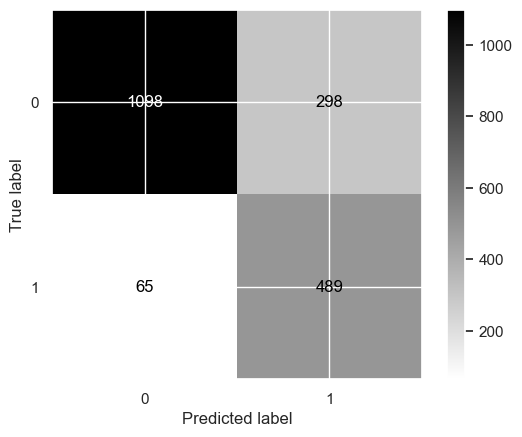

In [78]:
# Prédiction avec les hyperparamètres optimisés

svc_tuned_test = svc_tuned.predict(X_test)

print('Recall score for SVC Tuned test-set:', recall_score(y_test, svc_tuned_test).round(2))
print('')
print('Classification report for SVC Tuned test-set:')
print('')
print(classification_report(y_test, svc_tuned_test))
print('')
print('Confusion Matrix for SVC Tuned test-set:')
print(ConfusionMatrixDisplay.from_estimator(svc_tuned, X_test, y_test, cmap='binary'))

In [79]:
# cross validation pour le SVC optimisé

svc_tuned_scores = cross_val_score(svc_tuned, X_train, y_train,
                         scoring="recall", cv=10)

print(f'Recall cross validation values for SVC Tuned (10 times validations): \n{svc_tuned_scores}')
print('')
print(f'Recall cross validation mean value for SVC Tuned: {svc_tuned_scores.mean().round(2)}')
print(f'Recall cross validation standard deviation value for SVC Tuned: {svc_tuned_scores.std().round(2)}')
print('Recall cross validation range value for SVC Tuned: ', (svc_tuned_scores.mean().round(2) - svc_tuned_scores.std().round(2)) , '-', (svc_tuned_scores.mean().round(2) + svc_tuned_scores.std().round(2)))

Recall cross validation values for SVC Tuned (10 times validations): 
[0.85384615 0.87692308 0.88372093 0.84496124 0.89147287 0.86821705
 0.8372093  0.86046512 0.79069767 0.89922481]

Recall cross validation mean value for SVC Tuned: 0.86
Recall cross validation standard deviation value for SVC Tuned: 0.03
Recall cross validation range value for SVC Tuned:  0.83 - 0.89


In [80]:
# Comparaison avant et après optimisation

svc_data = [{'Model': 'SVC Baseline', 'Recall' : svc_scores.mean().round(3), 'Std. Dev' : svc_scores.std().round(2)},
             {'Model': 'SVC Tuned', 'Recall' : svc_tuned_scores.mean().round(3), 'Std. Dev' : svc_tuned_scores.std().round(2)}
]

svc_compare = pd.DataFrame(svc_data).sort_values(by = 'Recall', ascending = False)

svc_compare

,Model,Recall,Std. Dev
1,SVC Tuned,0.861,0.03
0,SVC Baseline,0.844,0.03


Le rapport compare un SVC optimisé avec le modèle de base. Le SVC optimisé a obtenu un score de rappel de 0,876, ce qui reflète sa capacité à identifier correctement les instances positives, contre 0,831 pour le modèle de base. L’optimisation des hyperparamètres, notamment les paramètres C, class_weight, gamma et kernel, a permis d’améliorer les performances du modèle optimisé.

L’analyse de la matrice de confusion a révélé une réduction significative des faux négatifs (59 cas) pour le modèle optimisé, démontrant une meilleure capacité prédictive, notamment pour identifier la classe minoritaire.

Dans l’ensemble, ce rapport met en évidence l’efficacité de l’optimisation des hyperparamètres pour améliorer la performance du modèle SVC et souligne la supériorité du modèle optimisé par rapport à la version de base.

## ix. Sauvegarde du modele

Dans cette section, nous allons sauvegarder tous les fichiers nécessaires afin de pouvoir exécuter l’inférence du modèle sans erreurs et de manière efficace.

In [81]:
# Préparation pour la sauvegarde du modèle SVC optimisé

all_process_svc_tuned = Pipeline([
    ('preprocessing', preprocess),
    ('over', SMOTENC([num for num in range(7, 16)], sampling_strategy = 0.5, random_state = 42)),
    ('under', RandomUnderSampler(random_state = 42)),
    ('classifier', SVC(C = 0.1, class_weight = 'balanced', gamma = 'auto', kernel = 'poly', random_state = 42))
])

all_process_svc_tuned.fit(X_train, y_train)

svc_tuned_result = all_process_svc_tuned.predict(X_test)

print(classification_report(y_test, svc_tuned_result))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1396
           1       0.65      0.82      0.73       554

    accuracy                           0.82      1950
   macro avg       0.79      0.82      0.80      1950
weighted avg       0.84      0.82      0.83      1950



In [83]:
import pickle

In [85]:
# Sauvegarde du modèle entraîné

pickle.dump(all_process_svc_tuned, open('svc_tuned_pred.pkl', 'wb'))

## x. Inférence du modèle

L’inférence du modèle sera réalisée dans un autre notebook afin d’éviter toute erreur et pour maximiser la précision des résultats.

## xi. Conclusion

Le churn fait référence aux clients qui quittent un produit ou un service, et un taux de churn élevé peut poser problème.
Dans le graphique fourni, 72 % des clients choisissent de rester tandis que 28 % se désabonnent, ce qui entraîne un déséquilibre des données.
Le genre ne semble pas avoir de corrélation significative avec le churn, ce qui indique que d’autres facteurs peuvent jouer un rôle plus important.
L’âge, en revanche, montre une corrélation : les clients plus âgés, en particulier ceux de plus de 60 ans, sont plus susceptibles de se désabonner.
L’état matrimonial influence également le churn, les personnes mariées ayant un taux de rétention plus élevé.
L’ancienneté dans le service et le revenu total présentent aussi une corrélation : une durée plus longue et un revenu plus élevé contribuent à un churn plus faible.
Néanmoins, des valeurs aberrantes existent : certains clients ayant un revenu élevé se désabonnent tout de même, probablement en raison d’autres facteurs.

La métrique d’évaluation utilisée dans ce cas est le recall (rappel), qui mesure la proportion de vrais positifs parmi tous les cas réellement positifs.
Le recall est précieux lorsque l’objectif est de minimiser les faux négatifs et de s’assurer que tous les cas positifs sont identifiés.
Par exemple, si nous prédisons qu’une personne va rester, mais qu’en réalité elle quitte l’abonnement, il s’agit d’un faux négatif dans notre cas, et nous voulons minimiser ce scénario autant que possible car il pourrait avoir un impact négatif sur l’entreprise.
Les pertes potentielles dues à une mauvaise prédiction du churn incluent : opportunités de rétention manquées, insatisfaction client, gaspillage de ressources, perte de revenus et dégradation de la réputation.

Le modèle SVC présente un bon ajustement statistique, comme le montre la comparaison des scores de métriques entre le jeu d’entraînement et le jeu de test.
Bien que la régression logistique ait affiché un score de recall légèrement supérieur, le SVC a été choisi pour l’optimisation en raison de sa capacité à produire des résultats plus équilibrés.
Les deux modèles affichent un bon ajustement, mais la décision de se concentrer sur le SVC vise à obtenir un résultat plus équilibré entre les classes.

La force de notre modèle réside dans son efficacité à gérer des données complexes.
Le SVC est performant lorsqu’il s’agit de données à forte dimensionnalité ou de jeux de données avec frontières de décision complexes.
Il peut capturer efficacement les relations non linéaires et les motifs, ce qui le rend adapté à la prédiction du churn où les relations entre les variables et l’attrition peuvent être complexes — un avantage considérable pour l’entreprise.

La faiblesse de notre modèle est sa sensibilité aux hyperparamètres.
La performance du SVC dépend fortement du choix de paramètres tels que C (paramètre de régularisation), le type de noyau et les paramètres spécifiques à ce noyau.
Un mauvais réglage peut entraîner une performance sous-optimale ou un surapprentissage, ce qui nécessite une optimisation minutieuse, de solides connaissances métiers et des experts pour exploiter le modèle correctement.

Pour améliorer les résultats futurs, plusieurs points clés peuvent être abordés :

- Mener une ingénierie des variables plus poussée afin d’identifier les caractéristiques les plus discriminantes.

- Explorer un éventail plus large d’algorithmes pour sélectionner le plus adapté au jeu de données.

- Utiliser des algorithmes conçus pour gérer les données déséquilibrées afin d’améliorer la performance.

- Réaliser un tuning d’hyperparamètres précis pour trouver un équilibre optimal sans surapprentissage.

En se concentrant sur ces axes, les futures itérations pourront améliorer le modèle de prédiction du churn, conduisant à des résultats plus précis et plus fiables.